<a href="https://cognitiveclass.ai"><img src = "https://ibm.box.com/shared/static/9gegpsmnsoo25ikkbl4qzlvlyjbgxs5x.png" width = 400> </a>

<h1 align=center><font size = 5>Learning FourSquare API with Python</font></h1>

# C9_WK4,5_ASSIGNMENT_RD

Table of Contents

1. <a href="#item1">INTRODUCTION</a>
2. <a href="#item2">DATA</a>  
3. <a href="#item3">BATTLE OF LA  NEIGHBORHOODS - METHODOLOGY: EXPLORE VENUES</a>  
4. <a href="#item4">BATTLE OF LA  NEIGHBORHOODS - METHODOLOGY: CLUSTER VENUES</a>  
5. <a href="#item5">BATTLE OF LA  NEIGHBORHOODS - METHODOLOGY: EVALUATE NEIGHBORHOODS FURTHER</a>  
6. <a href="#item5">RESULTS</a>  
7. <a href="#item5">CONCLUSIONS</a>  

## 1) INTRODUCTION



### 1.1) BACKGROUND AND BUSINESS PROBLEM


As people relocate between cities for work or otherwise, they often start out in  the new location by renting.

As you move to a new city, how would one choose the area of the new city in which to  live?

This would depend a lot on the individuals personal choices and lifestyle.

Using rental data that is available online, I would like  to explore the use of the Four Square API app to see if the combination  can be used to get a better understanding of neighborhoods in a target ciy and if, based on user input and preference, any neighborhoods in a city  are of greater interest to rent in  as compared to others.

The city that I will be exploring will be Los Angeles, CA.


### 1.2) DATA

The average rental rates for different neighborhoods in  the city of Los Angeles are available at:

https://www.rentcafe.com/average-rent-market-trends/us/ca/los-angeles/

This neighborhood and rental data will  be extracted to csv and then into a dataframe and cleaned.

I will try to pair this data, with information on the different LA neighbourhoods, obtained through the Four Square API app.<br>
I will use this rental data and the API app to explore different venues in the LA neighborhoods to try get an idea of what are the high traffic offerings in the various neighborhoods. 

I will use one hot encoding to try to find the ten most frequently occurring venues in  the different neighborhoods.

I will then apply K-Means Clustering Machine Learning algorithm on the acquired neighborhood-venue data to cluster the data into five clusters.

The Neighborhood cluster will then be plotted on a map of LA city using Folium.

I will then filter the Neighborhood-Venue frequency data set, using venues of my choice and look for neighborhoods where these venues  are among the top three most frequent venues.

Using the FourSquare API, I will then search any two of these neighborhoods further, with five  venues of my choice and try to determine the frequency of occurrance of these venues, within a distance of 2000m of their neighborhood  coordinates.

Once I have all this information, I will try to put all this information together to look for similarities/differences in the two neighborhoods and see if any one neighborhood is more preferred to rent in than the other.

The final goal is to see whether this data can be used  to differentiate between the neighborhoods and be used by people to make a better decisions on choice of city neighborhood to rent in. 


### 1.3) Import necessary Libraries

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

#!conda install -c conda-forge geopy --yes  #<- Uncheck is not installed
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes #<- Uncheck is not installed
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [2]:
pip install lxml

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


### 1.4) Define Foursquare Credentials and Version

##### Make sure that you have created a Foursquare developer account and have your credentials handy

In [4]:
CLIENT_ID = 'ND4XM0TEO203FMDF5YICGXO14O1R0YXG1Z3EE051BCUY4QBM' # your Foursquare ID. 
CLIENT_SECRET = 'B5GTDFPKINB0ZJIRQZ4C2D0QXPYKN0PTNUXXQT5BPKHARRKO' # your Foursquare Secret.
VERSION = '20180604'
#LIMIT = 5
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ND4XM0TEO203FMDF5YICGXO14O1R0YXG1Z3EE051BCUY4QBM
CLIENT_SECRET:B5GTDFPKINB0ZJIRQZ4C2D0QXPYKN0PTNUXXQT5BPKHARRKO


## 2) DATA

### 2.1)LOAD AND CLEAN THE DATA

In [5]:
#Get LA rental information from website
#https://www.rentcafe.com/average-rent-market-trends/us/ca/los-angeles/
# Website table was not directly accessible through pandas, so I copied and saved it as a .csv

#read in .csv
la_rent1 = pd.read_csv("LA_RentByNEighbourhood_mod2.csv") 

#rename column
la_rent1.rename(columns = {'Average Monthly Rent (USD)':'AverageMonthlyRent_USD'}, inplace = True)
la_rent1.rename(columns = {'Neighborhood':'LA_Neighborhood'}, inplace = True)

# remove the $sign
la_rent1['AverageMonthlyRent_USD'] = la_rent1.AverageMonthlyRent_USD.str.replace('$', '')

# remove the comma
la_rent1['AverageMonthlyRent_USD'] = la_rent1.AverageMonthlyRent_USD.str.replace(',', '')

#add string 'CA, USA' to LA_Neighborhood
la_rent1['LA_Neighborhood'] = la_rent1['LA_Neighborhood'].astype(str) + ', CA, USA'

#drop extra column
#la_rent.drop(['AverageMonthlyRent'],axis=1,inplace=True) 
la_rent1.head()

la_rent=la_rent1
la_rent.head()


,LA_Neighborhood,AverageMonthlyRent_USD
0,"Jefferson Park, CA, USA",1355
1,"El Sereno, CA, USA",1396
2,"Vermont Vista, CA, USA",1445
3,"Vermont Knolls, CA, USA",1445
4,"Hyde Park, CA, USA",1484


In [6]:
#Get datatypes in dataframe
la_rent.dtypes

LA_Neighborhood           object
AverageMonthlyRent_USD    object
dtype: object

In [7]:
# Convert Column Average Monthly Rent to float data type

la_rent.AverageMonthlyRent_USD =la_rent.AverageMonthlyRent_USD.astype(float) 
la_rent.dtypes

LA_Neighborhood            object
AverageMonthlyRent_USD    float64
dtype: object

In [8]:
#Check the dataframe
la_rent.head()

,LA_Neighborhood,AverageMonthlyRent_USD
0,"Jefferson Park, CA, USA",1355.0
1,"El Sereno, CA, USA",1396.0
2,"Vermont Vista, CA, USA",1445.0
3,"Vermont Knolls, CA, USA",1445.0
4,"Hyde Park, CA, USA",1484.0


In [9]:
la_rent.shape

(98, 2)

Now we need to add latitude and longitude data to the Neighborhood information

In [10]:
# Convert column Neighborhood to list
LA_Neighborhood_list = la_rent['LA_Neighborhood'].tolist()
LA_Neighborhood_list

['Jefferson Park, CA, USA',
 'El Sereno, CA, USA',
 'Vermont Vista, CA, USA',
 'Vermont Knolls, CA, USA',
 'Hyde Park, CA, USA',
 'Glassell Park, CA, USA',
 'Cypress Park, CA, USA',
 'Winnetka, CA, USA',
 'Sunland, CA, USA',
 'Leimert Park, CA, USA',
 'Panorama City, CA, USA',
 'Sun Valley, CA, USA',
 'Arlington Heights, CA, USA',
 'Shadow Hills, CA, USA',
 'Harvard Heights, CA, USA',
 'North Hills, CA, USA',
 'Pacoima, CA, USA',
 'Arleta, CA, USA',
 'Vermont - Slauson, CA, USA',
 'Reseda, CA, USA',
 'Tarzana, CA, USA',
 'Manchester Square, CA, USA',
 'Harvard Park, CA, USA',
 'Gramercy Park, CA, USA',
 'Chesterfield Square, CA, USA',
 'Van Nuys, CA, USA',
 'Baldwin Hills - Crenshaw, CA, USA',
 'Lake View Terrace, CA, USA',
 'West Hills, CA, USA',
 'Valley Glen, CA, USA',
 'Lake Balboa, CA, USA',
 'Sylmar, CA, USA',
 'West Adams, CA, USA',
 'Boyle Heights, CA, USA',
 'Vermont Square, CA, USA',
 'Northridge, CA, USA',
 'Highland Park, CA, USA',
 'Chatsworth, CA, USA',
 'Canoga Park, CA,

In [11]:
#Create empty dataframe for input of latitude and logitude data

## define the dataframe columns
column_names = ['LA_Neighborhood', 'Latitude', 'Longitude'] 

## instantiate the dataframe
LA_lat_long = pd.DataFrame(columns=column_names)
LA_lat_long.head()

,LA_Neighborhood,Latitude,Longitude


In [12]:
##Gets the coordinates for LA Neighborhoods  and append to list
LA_address_list = []
LA_lat_list = []
LA_long_list = []

#Gets the coordinates for listed LA Neighborhoods  
for Neighborhood in LA_Neighborhood_list:
    address =  Neighborhood

    geolocator = Nominatim(user_agent= "foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    #LA_lat_long_list.append [(Neighborhood, Latitude, Longitude )]
    LA_address_list.append (Neighborhood)
    LA_lat_list.append(latitude)
    LA_long_list.append(longitude)
    #print(address, latitude, longitude)
    

In [13]:
# Create dataframe from the lists
LA_lat_long['LA_Neighborhood'] = LA_address_list
LA_lat_long['Latitude'] = LA_lat_list
LA_lat_long['Longitude'] = LA_long_list
LA_lat_long

,LA_Neighborhood,Latitude,Longitude
0,"Jefferson Park, CA, USA",34.027234,-118.317576
1,"El Sereno, CA, USA",34.081121,-118.177849
2,"Vermont Vista, CA, USA",33.941947,-118.285814
3,"Vermont Knolls, CA, USA",33.966819,-118.291670
4,"Hyde Park, CA, USA",33.980569,-118.330631
...,...,...,...
93,"Beverly Grove, CA, USA",34.076034,-118.369972
94,"Historic South-Central, CA, USA",34.016230,-118.267308
95,"University Park, CA, USA",34.027449,-118.283949
96,"Pico, CA, USA",34.040672,-118.266192


In [14]:
LA_lat_long.shape

(98, 3)

Add the rent information to the dataframe

In [15]:
#Full outer join of la_rent and LA_lat_long dataframes
la_data = pd.merge(left=la_rent, right=LA_lat_long, how='outer', left_on='LA_Neighborhood', right_on='LA_Neighborhood')
la_data.head()

,LA_Neighborhood,AverageMonthlyRent_USD,Latitude,Longitude
0,"Jefferson Park, CA, USA",1355.0,34.027234,-118.317576
1,"El Sereno, CA, USA",1396.0,34.081121,-118.177849
2,"Vermont Vista, CA, USA",1445.0,33.941947,-118.285814
3,"Vermont Knolls, CA, USA",1445.0,33.966819,-118.291670
4,"Hyde Park, CA, USA",1484.0,33.980569,-118.330631


In [16]:
#rename column
la_data.rename(columns = {'LA_Neighborhood':'Neighborhood'}, inplace = True)
la_data.head()

,Neighborhood,AverageMonthlyRent_USD,Latitude,Longitude
0,"Jefferson Park, CA, USA",1355.0,34.027234,-118.317576
1,"El Sereno, CA, USA",1396.0,34.081121,-118.177849
2,"Vermont Vista, CA, USA",1445.0,33.941947,-118.285814
3,"Vermont Knolls, CA, USA",1445.0,33.966819,-118.291670
4,"Hyde Park, CA, USA",1484.0,33.980569,-118.330631


In [17]:
la_data.dtypes

Neighborhood               object
AverageMonthlyRent_USD    float64
Latitude                  float64
Longitude                 float64
dtype: object

## 2.2  VIEW NEIGHBORHOODS ON FOLIUM

In [18]:
# View these neighborhoos on a map using Folium
# Use geopy library to get coordinated og Los Angeles city.

address = 'Los Angeles, CA'

geolocator = Nominatim(user_agent="la_explorer")
location = geolocator.geocode(address)
la_latitude = location.latitude
la_longitude = location.longitude
print('The geograpical coordinate of Los Angeles City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Los Angeles City are 34.0250724, -118.4965129.


In [19]:
#Create a map of Los Angeles with neighborhoods superimposed on top!
map_la = folium.Map(location=[la_latitude, la_longitude], zoom_start=10)

# add markers to map
for lat, lng, LA_Neighborhood in zip(la_data['Latitude'], la_data['Longitude'], la_data['Neighborhood']):
        label = '{}'.format(LA_Neighborhood)
        label = folium.Popup(label, parse_html=True)
        folium.features.CircleMarker(
        [lat, lng],
        radius=3,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6).add_to(map_la)

map_la


# 3) BATTLE OF LA  NEIGHBORHOODS - METHODOLOGY:  EXPLORE VENUES

## 3.1) EXPLORE VENUES of high traffic in the listed LA neighborhoods.

In [20]:
# Pull up neighborhoods dataframe
la_data.head()

,Neighborhood,AverageMonthlyRent_USD,Latitude,Longitude
0,"Jefferson Park, CA, USA",1355.0,34.027234,-118.317576
1,"El Sereno, CA, USA",1396.0,34.081121,-118.177849
2,"Vermont Vista, CA, USA",1445.0,33.941947,-118.285814
3,"Vermont Knolls, CA, USA",1445.0,33.966819,-118.291670
4,"Hyde Park, CA, USA",1484.0,33.980569,-118.330631


In [21]:
# Use geopy library to get coordinates of listed LA neighborhoods 

#search_query = [Location1, Location2, Location3, Location4, Location5]

# Choose you radius (meters) and the number of hits returned(Limit)
radius = 500
LIMIT=5

def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=5):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [22]:
#write the code to run the above function on each neighborhood and create a new dataframe called la_venues.
#If there is an error, rerun the cell.

la_venues = getNearbyVenues(names=la_data['Neighborhood'],
                                   latitudes=la_data['Latitude'],
                                   longitudes=la_data['Longitude']
                                   )

Jefferson Park, CA, USA
El Sereno, CA, USA
Vermont Vista, CA, USA
Vermont Knolls, CA, USA
Hyde Park, CA, USA
Glassell Park, CA, USA
Cypress Park, CA, USA
Winnetka, CA, USA
Sunland, CA, USA
Leimert Park, CA, USA
Panorama City, CA, USA
Sun Valley, CA, USA
Arlington Heights, CA, USA
Shadow Hills, CA, USA
Harvard Heights, CA, USA
North Hills, CA, USA
Pacoima, CA, USA
Arleta, CA, USA
Vermont - Slauson, CA, USA
Reseda, CA, USA
Tarzana, CA, USA
Manchester Square, CA, USA
Harvard Park, CA, USA
Gramercy Park, CA, USA
Chesterfield Square, CA, USA
Van Nuys, CA, USA
Baldwin Hills - Crenshaw, CA, USA
Lake View Terrace, CA, USA
West Hills, CA, USA
Valley Glen, CA, USA
Lake Balboa, CA, USA
Sylmar, CA, USA
West Adams, CA, USA
Boyle Heights, CA, USA
Vermont Square, CA, USA
Northridge, CA, USA
Highland Park, CA, USA
Chatsworth, CA, USA
Canoga Park, CA, USA
Granada Hills, CA, USA
Eagle Rock, CA, USA
Koreatown, CA, USA
Encino, CA, USA
Windsor Square, CA, USA
Lincoln Heights, CA, USA
North Hollywood, CA, U

In [23]:
print(la_venues.shape)
la_venues.head()

(443, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Jefferson Park, CA, USA",34.027234,-118.317576,Subway,34.025798,-118.321471,Sandwich Place
1,"Jefferson Park, CA, USA",34.027234,-118.317576,Burger Palace,34.025680,-118.317412,Burger Joint
2,"Jefferson Park, CA, USA",34.027234,-118.317576,"Louisiana Fried Chicken, Chinese Food & Donuts",34.025931,-118.317901,Fried Chicken Joint
3,"Jefferson Park, CA, USA",34.027234,-118.317576,Jefferson Park,34.024528,-118.319029,Neighborhood
4,"Jefferson Park, CA, USA",34.027234,-118.317576,El Valle Oaxaqueno,34.025366,-118.320779,Mexican Restaurant


In [24]:
#Check how many venues were returned for each neighborhood
la_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adams - Normandie, CA, USA",5,5,5,5,5,5
"Arleta, CA, USA",3,3,3,3,3,3
"Arlington Heights, CA, USA",5,5,5,5,5,5
"Atwater Village, CA, USA",5,5,5,5,5,5
"Baldwin Hills - Crenshaw, CA, USA",3,3,3,3,3,3
...,...,...,...,...,...,...
"Westlake, CA, USA",5,5,5,5,5,5
"Westwood, CA, USA",5,5,5,5,5,5
"Windsor Square, CA, USA",5,5,5,5,5,5


In [25]:
#Find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(la_venues['Venue Category'].unique())))

There are 144 uniques categories.


## 3.2) Analyze Each Neighborhood

In [26]:
# one hot encoding
la_onehot = pd.get_dummies(la_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
la_onehot['Neighborhood'] = la_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [la_onehot.columns[-1]] + list(la_onehot.columns[:-1])
la_onehot = la_onehot[fixed_columns]

la_onehot.head()

,Yoga Studio,ATM,American Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Auto Garage,BBQ Joint,Bagel Shop,...,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Trail,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
la_onehot.shape

(443, 144)

In [28]:
#Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
la_grouped = la_onehot.groupby('Neighborhood').mean().reset_index()
la_grouped

,Neighborhood,Yoga Studio,ATM,American Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Auto Garage,BBQ Joint,...,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Trail,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint
0,"Adams - Normandie, CA, USA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,"Arleta, CA, USA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,"Arlington Heights, CA, USA",0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,"Atwater Village, CA, USA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,"Baldwin Hills - Crenshaw, CA, USA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,"Westlake, CA, USA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
93,"Westwood, CA, USA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.200000,0.0,0.0,0.0,0.0,0.0
94,"Windsor Square, CA, USA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
95,"Winnetka, CA, USA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [29]:
la_grouped.shape

(97, 144)

In [30]:
#Print each neighborhood along with the top 5 most common venues
num_top_venues = 5

for hood in la_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = la_grouped[la_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adams - Normandie, CA, USA----
               venue  freq
0   Sushi Restaurant   0.6
1        Gas Station   0.2
2         Taco Place   0.2
3        Yoga Studio   0.0
4  Mobile Phone Shop   0.0


----Arleta, CA, USA----
           venue  freq
0  Movie Theater  0.67
1  Historic Site  0.33
2           Park  0.00
3      Multiplex  0.00
4         Museum  0.00


----Arlington Heights, CA, USA----
                       venue  freq
0          Convenience Store   0.2
1                 Restaurant   0.2
2                Art Gallery   0.2
3  Latin American Restaurant   0.2
4                       Café   0.2


----Atwater Village, CA, USA----
                venue  freq
0  Italian Restaurant   0.2
1         Pizza Place   0.2
2  Mexican Restaurant   0.2
3              Bakery   0.2
4      Farmers Market   0.2


----Baldwin Hills - Crenshaw, CA, USA----
         venue  freq
0         Park  0.33
1  Music Venue  0.33
2        Trail  0.33
3  Yoga Studio  0.00
4    Multiplex  0.00


----Bel Air, CA, 

In [ ]:
# Put that into a pandas dataframe
#Write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


In [32]:
#Create the new dataframe and display the top 10 venues for each neighborhood.
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = la_grouped['Neighborhood']

for ind in np.arange(la_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(la_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(10)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adams - Normandie, CA, USA",Sushi Restaurant,Taco Place,Gas Station,Wings Joint,Food Service,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Farm
1,"Arleta, CA, USA",Movie Theater,Historic Site,Wings Joint,Donut Shop,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Farm,Dive Bar
2,"Arlington Heights, CA, USA",Convenience Store,Art Gallery,Restaurant,Café,Latin American Restaurant,Donut Shop,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market
3,"Atwater Village, CA, USA",Mexican Restaurant,Bakery,Pizza Place,Italian Restaurant,Farmers Market,Food Service,Food,Flower Shop,Filipino Restaurant,Fast Food Restaurant
4,"Baldwin Hills - Crenshaw, CA, USA",Trail,Park,Music Venue,Wings Joint,Donut Shop,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Farm
5,"Bel Air, CA, USA",Golf Course,Hotel Bar,Hotel,Restaurant,Café,Wings Joint,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Farm
6,"Beverly Grove, CA, USA",Spa,Breakfast Spot,Coffee Shop,Vegetarian / Vegan Restaurant,Café,Farm,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market
7,"Beverlywood, CA, USA",Park,Wings Joint,Donut Shop,Food,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Farm,Dive Bar
8,"Blair Hills, CA, USA",Park,Furniture / Home Store,Scenic Lookout,Wings Joint,Dive Bar,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Farm,Donut Shop
9,"Boyle Heights, CA, USA",Mexican Restaurant,Bakery,Pharmacy,Japanese Restaurant,Café,Food Service,Food,Flower Shop,Filipino Restaurant,Fast Food Restaurant


# 4) BATTLE OF LA  NEIGHBORHOODS - METHODOLOGY: CLUSTER VENUES

## 4.1) Run k-means to cluster the neighborhood into 5 clusters.

In [33]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

In [34]:
# set number of clusters
kclusters = 5

la_grouped_clustering = la_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(la_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 


array([0, 0, 0, 2, 0, 0, 0, 1, 1, 2], dtype=int32)

## 4.2) Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [35]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

la_merged = la_data

# merge la_grouped with la_data to add latitude/longitude for each neighborhood
la_merged = la_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

la_merged.head()
# check the last columns!

,Neighborhood,AverageMonthlyRent_USD,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Jefferson Park, CA, USA",1355.0,34.027234,-118.317576,2.0,Burger Joint,Mexican Restaurant,Fried Chicken Joint,Sandwich Place,Donut Shop,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Farm
1,"El Sereno, CA, USA",1396.0,34.081121,-118.177849,2.0,Pizza Place,Restaurant,Thrift / Vintage Store,Liquor Store,Mexican Restaurant,Donut Shop,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market
2,"Vermont Vista, CA, USA",1445.0,33.941947,-118.285814,0.0,Burger Joint,Market,Wings Joint,Food Truck,Food,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Farm
3,"Vermont Knolls, CA, USA",1445.0,33.966819,-118.291670,0.0,Sandwich Place,Grocery Store,Burger Joint,ATM,Cosmetics Shop,Cuban Restaurant,Dance Studio,Deli / Bodega,Discount Store,Dive Bar
4,"Hyde Park, CA, USA",1484.0,33.980569,-118.330631,0.0,Pizza Place,Donut Shop,Motel,Taco Place,Wings Joint,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Farm


In [36]:
# Remove null objects in dataframe
la_merged.isnull() #to check for null values
la_merged = la_merged.fillna(0)
la_merged['Cluster Labels'] =la_merged['Cluster Labels'].astype(int)



## 4,2) VIEW CLUSTERS ON FOLIUM MAP

In [37]:
### Finally, let's visualize the resulting clusters
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(la_merged['Latitude'], la_merged['Longitude'], la_merged['Neighborhood'], la_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-5],
        fill=True,
        fill_color=rainbow[cluster-5],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [38]:
la_merged

,Neighborhood,AverageMonthlyRent_USD,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Jefferson Park, CA, USA",1355.0,34.027234,-118.317576,2,Burger Joint,Mexican Restaurant,Fried Chicken Joint,Sandwich Place,Donut Shop,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Farm
1,"El Sereno, CA, USA",1396.0,34.081121,-118.177849,2,Pizza Place,Restaurant,Thrift / Vintage Store,Liquor Store,Mexican Restaurant,Donut Shop,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market
2,"Vermont Vista, CA, USA",1445.0,33.941947,-118.285814,0,Burger Joint,Market,Wings Joint,Food Truck,Food,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Farm
3,"Vermont Knolls, CA, USA",1445.0,33.966819,-118.291670,0,Sandwich Place,Grocery Store,Burger Joint,ATM,Cosmetics Shop,Cuban Restaurant,Dance Studio,Deli / Bodega,Discount Store,Dive Bar
4,"Hyde Park, CA, USA",1484.0,33.980569,-118.330631,0,Pizza Place,Donut Shop,Motel,Taco Place,Wings Joint,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Farm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,"Beverly Grove, CA, USA",3804.0,34.076034,-118.369972,0,Spa,Breakfast Spot,Coffee Shop,Vegetarian / Vegan Restaurant,Café,Farm,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market
94,"Historic South-Central, CA, USA",3844.0,34.016230,-118.267308,2,Grocery Store,Donut Shop,Mexican Restaurant,Shopping Mall,Fast Food Restaurant,Flower Shop,Filipino Restaurant,Farmers Market,Farm,Wings Joint
95,"University Park, CA, USA",3890.0,34.027449,-118.283949,0,College Residence Hall,Shipping Store,Mediterranean Restaurant,Grocery Store,Coffee Shop,Cosmetics Shop,Cuban Restaurant,Dance Studio,Deli / Bodega,Discount Store
96,"Pico, CA, USA",3939.0,34.040672,-118.266192,0,Basketball Stadium,Sports Bar,Basketball Court,Shoe Store,Café,Wings Joint,Food Service,Flower Shop,Filipino Restaurant,Fast Food Restaurant


## 4.3) Examine Clusters

#### Cluster 1

In [39]:
# Cluster 1
la_merged.loc[la_merged['Cluster Labels'] == 0, la_merged.columns[[0,1] + list(range(5, la_merged.shape[1]))]]

,Neighborhood,AverageMonthlyRent_USD,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,"Vermont Vista, CA, USA",1445.0,Burger Joint,Market,Wings Joint,Food Truck,Food,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Farm
3,"Vermont Knolls, CA, USA",1445.0,Sandwich Place,Grocery Store,Burger Joint,ATM,Cosmetics Shop,Cuban Restaurant,Dance Studio,Deli / Bodega,Discount Store,Dive Bar
4,"Hyde Park, CA, USA",1484.0,Pizza Place,Donut Shop,Motel,Taco Place,Wings Joint,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Farm
5,"Glassell Park, CA, USA",1485.0,Pool,Pharmacy,Shipping Store,Café,Bakery,Donut Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Farm
9,"Leimert Park, CA, USA",1575.0,Caribbean Restaurant,Performing Arts Venue,Park,Auto Garage,Donut Shop,Wings Joint,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market
...,...,...,...,...,...,...,...,...,...,...,...,...
91,"Century City, CA, USA",3683.0,Food Service,Japanese Restaurant,Art Gallery,Steakhouse,Chinese Restaurant,Farm,Food,Flower Shop,Filipino Restaurant,Fast Food Restaurant
92,"Pacific Palisades, CA, USA",3765.0,Bakery,Italian Restaurant,Coffee Shop,Café,Farmers Market,Wings Joint,Food,Flower Shop,Filipino Restaurant,Fast Food Restaurant
93,"Beverly Grove, CA, USA",3804.0,Spa,Breakfast Spot,Coffee Shop,Vegetarian / Vegan Restaurant,Café,Farm,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market
95,"University Park, CA, USA",3890.0,College Residence Hall,Shipping Store,Mediterranean Restaurant,Grocery Store,Coffee Shop,Cosmetics Shop,Cuban Restaurant,Dance Studio,Deli / Bodega,Discount Store


#### Cluster 2

In [40]:
#Cluster2
la_merged.loc[la_merged['Cluster Labels'] == 1, la_merged.columns[[0,1] + list(range(5, la_merged.shape[1]))]]

,Neighborhood,AverageMonthlyRent_USD,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,"Harvard Park, CA, USA",1738.0,Bus Stop,Park,Wings Joint,Farm,Food,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Donut Shop
28,"West Hills, CA, USA",1806.0,Business Service,Park,Wings Joint,Farm,Food,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Donut Shop
54,"Griffith Park, CA, USA",2180.0,Park,Scenic Lookout,Tea Room,Dive Bar,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Farm,Donut Shop
63,"Beverlywood, CA, USA",2400.0,Park,Wings Joint,Donut Shop,Food,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Farm,Dive Bar
78,"Blair Hills, CA, USA",2830.0,Park,Furniture / Home Store,Scenic Lookout,Wings Joint,Dive Bar,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Farm,Donut Shop


#### Cluster 3

In [41]:
#Cluster 3
la_merged.loc[la_merged['Cluster Labels'] == 2, la_merged.columns[[0,1] + list(range(5, la_merged.shape[1]))]]

,Neighborhood,AverageMonthlyRent_USD,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Jefferson Park, CA, USA",1355.0,Burger Joint,Mexican Restaurant,Fried Chicken Joint,Sandwich Place,Donut Shop,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Farm
1,"El Sereno, CA, USA",1396.0,Pizza Place,Restaurant,Thrift / Vintage Store,Liquor Store,Mexican Restaurant,Donut Shop,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market
6,"Cypress Park, CA, USA",1485.0,Mexican Restaurant,Discount Store,Park,Bakery,Farm,Food,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market
7,"Winnetka, CA, USA",1526.0,Mexican Restaurant,Latin American Restaurant,Filipino Restaurant,Bar,Convenience Store,Health & Beauty Service,Food Service,Cosmetics Shop,Cuban Restaurant,Dance Studio
14,"Harvard Heights, CA, USA",1607.0,Korean Restaurant,Mexican Restaurant,Japanese Restaurant,Fast Food Restaurant,Farm,Food Service,Food,Flower Shop,Filipino Restaurant,Farmers Market
16,"Pacoima, CA, USA",1629.0,Middle Eastern Restaurant,Burger Joint,Taco Place,Fast Food Restaurant,Mexican Restaurant,Farmers Market,Food Service,Food,Flower Shop,Filipino Restaurant
24,"Chesterfield Square, CA, USA",1738.0,Mexican Restaurant,Hardware Store,Mediterranean Restaurant,Marijuana Dispensary,Burger Joint,Deli / Bodega,Dance Studio,Discount Store,Dive Bar,Donut Shop
25,"Van Nuys, CA, USA",1757.0,Mexican Restaurant,Latin American Restaurant,Burger Joint,Filipino Restaurant,Mobile Phone Shop,Deli / Bodega,Discount Store,Dive Bar,Dance Studio,Food Truck
31,"Sylmar, CA, USA",1825.0,Pizza Place,Food Truck,Food,Mexican Restaurant,Cosmetics Shop,Cuban Restaurant,Dance Studio,Deli / Bodega,Discount Store,Food Service
33,"Boyle Heights, CA, USA",1847.0,Mexican Restaurant,Bakery,Pharmacy,Japanese Restaurant,Café,Food Service,Food,Flower Shop,Filipino Restaurant,Fast Food Restaurant


#### Cluster 4

In [42]:
#Cluster 4
la_merged.loc[la_merged['Cluster Labels'] == 3, la_merged.columns[[1] + list(range(5, la_merged.shape[1]))]]

,AverageMonthlyRent_USD,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,1571.0,Trail,Wings Joint,Donut Shop,Food,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Farm,Dive Bar
27,1793.0,Garden,Trail,Wings Joint,Donut Shop,Food,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Farm
61,2380.0,Trail,Wings Joint,Donut Shop,Food,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Farm,Dive Bar


#### Cluster 5

In [43]:
#Cluster 5
la_merged.loc[la_merged['Cluster Labels'] == 4, la_merged.columns[[0,1] + list(range(5, la_merged.shape[1]))]]

,Neighborhood,AverageMonthlyRent_USD,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
71,"Cheviot Hills, CA, USA",2605.0,Tennis Court,Wings Joint,Food Truck,Food,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Farm,Donut Shop


# 5) BATTLE OF LA  NEIGHBORHOODS - METHODOLOGY: EVALUATE THESE NEIGHBORHOODS FURTHER, LOOKING FOR SPECIFIC VENUES OF INTEREST

## 5.1.1) Method1 - Make your three selections for 1st Most Common Venue

In [44]:
Common1a = 'Theater'
Common1b = 'Theater'
Common1c = 'Theater'
df_first=la_merged[(la_merged['1st Most Common Venue'].str.contains(Common1a)) | (la_merged['1st Most Common Venue'].str.contains(Common1b)) | (la_merged['1st Most Common Venue'].str.contains(Common1c))].reset_index (drop=True)
df_first.head(7)

,Neighborhood,AverageMonthlyRent_USD,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Arleta, CA, USA",1634.0,34.241327,-118.432205,0,Movie Theater,Historic Site,Wings Joint,Donut Shop,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Farm,Dive Bar
1,"Larchmont, CA, USA",2140.0,34.079837,-118.317870,0,Indie Movie Theater,Korean Restaurant,Movie Theater,Park,American Restaurant,Cuban Restaurant,Dance Studio,Deli / Bodega,Discount Store,Food Service
2,"Mid-City, CA, USA",2188.0,34.041527,-118.360370,0,Indie Theater,Gym / Fitness Center,Liquor Store,Theater,Food Truck,Dance Studio,Deli / Bodega,Cuban Restaurant,Cosmetics Shop,Discount Store


In [45]:
df_first.shape

(3, 15)

## 5.1.2) Method2 - Make your three selections for first, second and third most common venues.

In [46]:
# 'AND' search of all the LA Neighborhoods using chosen venues.
Common1 = 'Theater'
Common2 = 'Theater'
Common3 = 'Theater'

df_and=la_merged[(la_merged['1st Most Common Venue'].str.contains(Common1)) & (la_merged['2nd Most Common Venue'].str.contains(Common2)) & (la_merged['3rd Most Common Venue'].str.contains(Common3))].reset_index (drop=True)
df_and.head()

,Neighborhood,AverageMonthlyRent_USD,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


In [47]:
df_and.shape

(0, 15)

In [48]:
# 'OR' search search of all the LA Neighborhoods using chosen venues.
df_or=la_merged[(la_merged['1st Most Common Venue'].str.contains(Common1)) | (la_merged['2nd Most Common Venue'].str.contains(Common2)) | (la_merged['3rd Most Common Venue'].str.contains(Common3))].reset_index (drop=True)

print ('Scan these neighborhood venues and select one to explore further')
df_or.head()

Scan these neighborhood venues and select one to explore further


,Neighborhood,AverageMonthlyRent_USD,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Arleta, CA, USA",1634.0,34.241327,-118.432205,0,Movie Theater,Historic Site,Wings Joint,Donut Shop,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Farm,Dive Bar
1,"Larchmont, CA, USA",2140.0,34.079837,-118.317870,0,Indie Movie Theater,Korean Restaurant,Movie Theater,Park,American Restaurant,Cuban Restaurant,Dance Studio,Deli / Bodega,Discount Store,Food Service
2,"Mid-City, CA, USA",2188.0,34.041527,-118.360370,0,Indie Theater,Gym / Fitness Center,Liquor Store,Theater,Food Truck,Dance Studio,Deli / Bodega,Cuban Restaurant,Cosmetics Shop,Discount Store
3,"Hollywood, CA, USA",2485.0,34.098003,-118.329523,0,Coffee Shop,Movie Theater,Multiplex,Salon / Barbershop,Farmers Market,Wings Joint,Donut Shop,Filipino Restaurant,Fast Food Restaurant,Farm
4,"Exposition Park, CA, USA",3522.0,34.013654,-118.287211,0,Science Museum,College Football Field,Movie Theater,Park,Wings Joint,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Farm,Donut Shop


In [49]:
df_or.shape

(5, 15)

USE NEIGHBORHOODS IN DATAFRAME  df_or TO SEARCH FURTHER.

In [50]:
# List neighborhoods resulting from the 'OR' search.
df_or.head(10)

,Neighborhood,AverageMonthlyRent_USD,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Arleta, CA, USA",1634.0,34.241327,-118.432205,0,Movie Theater,Historic Site,Wings Joint,Donut Shop,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Farm,Dive Bar
1,"Larchmont, CA, USA",2140.0,34.079837,-118.317870,0,Indie Movie Theater,Korean Restaurant,Movie Theater,Park,American Restaurant,Cuban Restaurant,Dance Studio,Deli / Bodega,Discount Store,Food Service
2,"Mid-City, CA, USA",2188.0,34.041527,-118.360370,0,Indie Theater,Gym / Fitness Center,Liquor Store,Theater,Food Truck,Dance Studio,Deli / Bodega,Cuban Restaurant,Cosmetics Shop,Discount Store
3,"Hollywood, CA, USA",2485.0,34.098003,-118.329523,0,Coffee Shop,Movie Theater,Multiplex,Salon / Barbershop,Farmers Market,Wings Joint,Donut Shop,Filipino Restaurant,Fast Food Restaurant,Farm
4,"Exposition Park, CA, USA",3522.0,34.013654,-118.287211,0,Science Museum,College Football Field,Movie Theater,Park,Wings Joint,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Farm,Donut Shop


## 5.2) Select your neighborhood and choose five venues/locations, whose presence in your selected neighborhood, you would like to explore further.

In [51]:

#Choose your target Neighborhood from df_or to analyze further.
y=4 #y is the row index in df_or. Changing this  changes your neighborhood selection.

#Choose your five locations to explore in your target neighborhood selected above
Location1 = 'Pharmacy'
Location2 = 'Market'
Location3 = 'Library'
Location4 = 'Theater'
Location5 = 'Restaurant'

LIMIT = 5
radius = 2000

range = len(df_first.index)

df_select = pd.DataFrame() 
latitude = df_or.iloc[y,2]
longitude = df_or.iloc[y,3]
Neighborhood = df_or.iloc[y,0]
AverageMonthlyRent = df_or.iloc[y,1]
#print(range)
#print(latitude)
#print(longitude)
#print(Neighborhood)
#print(AverageMonthlyRent, '$')

search_query = [Location1, Location2, Location3, Location4, Location5]
for search_query in search_query:
    #print (search_query) 
    #print (latitude)
    #print (longitude)
    #print (Neighborhood)
    #print(AverageMonthlyRent, '$')
        
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        latitude, 
        longitude, 
        VERSION, 
        search_query, 
        radius, 
        LIMIT)
    
    results = requests.get(url).json()
    results
    #print(results)
    venues = results['response']['venues']
    #dataframe = json_normalize(venues)
    dataframe1=pd.json_normalize(venues)
    #dataframe.head()
    ##df=dataframe[['name','location.address', 'location.lat', 'location.lng']].copy()
    #dataframe.append(dataframe[['name','location.address', 'location.lat', 'location.lng']])
    df_select = df_select.append(dataframe1)
    search_query=search_query[+1:+1]
    #dataframe.head()
    #df_select.head()
    df_select.reset_index(drop=False)
df_select.reset_index(drop=False) 

print ('Neighborhood chosen:', Neighborhood)
#print(Neighborhood_sel)
print('Average Monthly Rent:', AverageMonthlyRent, '$')
print ('Latitude:',latitude)
print ('Longitude:', longitude) 

Neighborhood chosen: Exposition Park, CA, USA
Average Monthly Rent: 3522.0 $
Latitude: 34.01365405
Longitude: -118.28721058194556


In [52]:
df_select.shape

(25, 18)

### 5.2.1) Filter dataframe to see if your chosen locations/category are present in the selected neighborhood

In [53]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in df_select.columns if col.startswith('location.')] + ['id']
df_sel_filtered = df_select.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
df_sel_filtered['categories'] = df_sel_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
df_sel_filtered.columns = [column.split('.')[-1] for column in df_sel_filtered.columns]

df_sel_filtered
df_sel_filtered.reset_index(drop=True)

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
0,University Park Campus Pharmacy (STU),Pharmacy,3601 Trousdale Pkwy,University of Southern California,34.020300,-118.285422,"[{'label': 'display', 'lat': 34.02029965714512...",757,90089,US,Los Angeles,CA,United States,[3601 Trousdale Pkwy (University of Southern C...,4c758f5fb474a1cd4ba2b9bf
1,CVS pharmacy,Pharmacy,3335 S Figueroa St,by 32nd St,34.023473,-118.279362,"[{'label': 'display', 'lat': 34.02347304225484...",1311,90007,US,Los Angeles,CA,United States,"[3335 S Figueroa St (by 32nd St), Los Angeles,...",4d3cf2ef84d46ea85da2025d
2,CVS pharmacy,Pharmacy,4030 S Western Ave,at W Martin Luther King Jr Blvd,34.010146,-118.308294,"[{'label': 'display', 'lat': 34.0101460845838,...",1984,90062,US,Los Angeles,CA,United States,[4030 S Western Ave (at W Martin Luther King J...,5320ec9011d2644cf9c6f385
3,USC Pharmacy,Student Center,NaN,NaN,34.024655,-118.283978,"[{'label': 'display', 'lat': 34.02465479249049...",1260,90007,US,Los Angeles,CA,United States,"[Los Angeles, CA 90007, United States]",502c10f4e4b03fdb3d1e1349
4,USC Health Center Pharmacy,Pharmacy,NaN,NaN,34.025229,-118.287238,"[{'label': 'display', 'lat': 34.02522901341101...",1288,90007,US,Los Angeles,CA,United States,"[Los Angeles, CA 90007, United States]",51116dfde4b0c342adb9e3b4
5,AJ Mini Market,Convenience Store,NaN,NaN,34.009812,-118.290948,"[{'label': 'display', 'lat': 34.00981224699274...",549,NaN,US,Los Angeles,CA,United States,"[Los Angeles, CA, United States]",4e32e7bab0fb3bf8109f317f
6,Luis Market,Butcher,4253 S Vermont Ave,NaN,34.006140,-118.292059,"[{'label': 'display', 'lat': 34.00614, 'lng': ...",948,90037,US,Los Angeles,CA,United States,"[4253 S Vermont Ave, Los Angeles, CA 90037, Un...",4eaef09782315d0ca63ab07e
7,All Seas Fish Market,Fast Food Restaurant,4320 S Vermont Ave,NaN,34.004900,-118.291323,"[{'label': 'display', 'lat': 34.0049, 'lng': -...",1045,90037,US,Los Angeles,CA,United States,"[4320 S Vermont Ave, Los Angeles, CA 90037, Un...",50787f1be4b00760ca61d88d
8,USC Farmers Market,Farmers Market,University Ave,btw W Jefferson Blvd & 32nd St,34.023907,-118.283701,"[{'label': 'display', 'lat': 34.02390722951203...",1186,90007,US,Los Angeles,CA,United States,[University Ave (btw W Jefferson Blvd & 32nd S...,4c740d2bdb52b1f704f874dc
9,C&C Liquor Market,Convenience Store,4606 S Broadway,46th & Broadway,34.001785,-118.278160,"[{'label': 'display', 'lat': 34.00178481347217...",1563,90037,US,Los Angeles,CA,United States,"[4606 S Broadway (46th & Broadway), Los Angele...",50dfe649e4b0a6d1c7534384


In [54]:
df_sel_filtered.shape

(25, 15)

### 5.2.2) Let's visualize venue categories identified using Folium maps.

In [55]:
# Visualize names
df_sel_filtered.name

0         University Park Campus Pharmacy (STU)
1                                  CVS pharmacy
2                                  CVS pharmacy
3                                  USC Pharmacy
4                    USC Health Center Pharmacy
0                                AJ Mini Market
1                                   Luis Market
2                          All Seas Fish Market
3                            USC Farmers Market
4                             C&C Liquor Market
0                 Doheny Memorial Library (DML)
1             Hoose Library of Philosophy (MHP)
2                Crocker Business Library (HOH)
3                             Law Library (LAW)
4    Seaver Science & Engineering Library (SSL)
0                                  IMAX Theater
1                   Norris Cinema Theater (NCT)
2                                       Theater
3            The Rosen Family Screening Theater
4                  theater near Huntington Park
0                     Parkside Restauran

### 5.2.3) Segregate Venue categories further by Venue and create dataframes for each category

In [56]:
# create a new dataframe for Location1 category
df_Location1=df_sel_filtered[(df_sel_filtered['name'].str.contains(Location1)) | (df_sel_filtered['categories'].str.contains(Location1))].reset_index (drop=True)
#df_Location1
##If hit are zero try replacing Location variable with actual criteria string searhed for.
#df_Location1=dataframe_filtered[dataframe_filtered.name.str.contains('string') | dataframe_filtered.categories.str.contains('string') ].reset_index (drop=True) #<- Unhash to run, replace ('string') with Location1 'string'
#df_Location1  #<- Unhash to run.

# count the number of Location1 categories found
#count_Loc1=df_Location1.count( axis=1, level=None, numeric_only=False)
count_Loc1=len(df_Location1.index)
count_Loc1


print (count_Loc1, Location1, 'were found within', radius, 'meters of neighborhood:', Neighborhood)
print ('Average monthly rent in ', Neighborhood, 'is $', AverageMonthlyRent)
df_Location1

5 Pharmacy were found within 2000 meters of neighborhood: Exposition Park, CA, USA
Average monthly rent in  Exposition Park, CA, USA is $ 3522.0


,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
0,University Park Campus Pharmacy (STU),Pharmacy,3601 Trousdale Pkwy,University of Southern California,34.020300,-118.285422,"[{'label': 'display', 'lat': 34.02029965714512...",757,90089,US,Los Angeles,CA,United States,[3601 Trousdale Pkwy (University of Southern C...,4c758f5fb474a1cd4ba2b9bf
1,CVS pharmacy,Pharmacy,3335 S Figueroa St,by 32nd St,34.023473,-118.279362,"[{'label': 'display', 'lat': 34.02347304225484...",1311,90007,US,Los Angeles,CA,United States,"[3335 S Figueroa St (by 32nd St), Los Angeles,...",4d3cf2ef84d46ea85da2025d
2,CVS pharmacy,Pharmacy,4030 S Western Ave,at W Martin Luther King Jr Blvd,34.010146,-118.308294,"[{'label': 'display', 'lat': 34.0101460845838,...",1984,90062,US,Los Angeles,CA,United States,[4030 S Western Ave (at W Martin Luther King J...,5320ec9011d2644cf9c6f385
3,USC Pharmacy,Student Center,NaN,NaN,34.024655,-118.283978,"[{'label': 'display', 'lat': 34.02465479249049...",1260,90007,US,Los Angeles,CA,United States,"[Los Angeles, CA 90007, United States]",502c10f4e4b03fdb3d1e1349
4,USC Health Center Pharmacy,Pharmacy,NaN,NaN,34.025229,-118.287238,"[{'label': 'display', 'lat': 34.02522901341101...",1288,90007,US,Los Angeles,CA,United States,"[Los Angeles, CA 90007, United States]",51116dfde4b0c342adb9e3b4


In [57]:
# create a new dataframe for Location2 category
df_Location2=df_sel_filtered[(df_sel_filtered['name'].str.contains(Location2)) | (df_sel_filtered['categories'].str.contains(Location2))].reset_index (drop=True)
#df_Location2
##If hit are zero try replacing Location variable with actual criteria string searhed for.
#df_Location1=dataframe_filtered[dataframe_filtered.name.str.contains('string') | dataframe_filtered.categories.str.contains('string') ].reset_index (drop=True) #<- Unhash to run, replace ('string') with Location1 'string'
#df_Location2  #<- Unhash to run.

# count the number of Location1 categories found
#count_Loc1=df_Location1.count( axis=1, level=None, numeric_only=False)
count_Loc2=len(df_Location2.index)
count_Loc2



print (count_Loc2, Location2, 'were found within', radius, 'meters of input neighborhood:', Neighborhood)
print ('Average monthly rent in ', Neighborhood, 'is $', AverageMonthlyRent)
df_Location2

5 Market were found within 2000 meters of input neighborhood: Exposition Park, CA, USA
Average monthly rent in  Exposition Park, CA, USA is $ 3522.0


,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
0,AJ Mini Market,Convenience Store,NaN,NaN,34.009812,-118.290948,"[{'label': 'display', 'lat': 34.00981224699274...",549,NaN,US,Los Angeles,CA,United States,"[Los Angeles, CA, United States]",4e32e7bab0fb3bf8109f317f
1,Luis Market,Butcher,4253 S Vermont Ave,NaN,34.006140,-118.292059,"[{'label': 'display', 'lat': 34.00614, 'lng': ...",948,90037,US,Los Angeles,CA,United States,"[4253 S Vermont Ave, Los Angeles, CA 90037, Un...",4eaef09782315d0ca63ab07e
2,All Seas Fish Market,Fast Food Restaurant,4320 S Vermont Ave,NaN,34.004900,-118.291323,"[{'label': 'display', 'lat': 34.0049, 'lng': -...",1045,90037,US,Los Angeles,CA,United States,"[4320 S Vermont Ave, Los Angeles, CA 90037, Un...",50787f1be4b00760ca61d88d
3,USC Farmers Market,Farmers Market,University Ave,btw W Jefferson Blvd & 32nd St,34.023907,-118.283701,"[{'label': 'display', 'lat': 34.02390722951203...",1186,90007,US,Los Angeles,CA,United States,[University Ave (btw W Jefferson Blvd & 32nd S...,4c740d2bdb52b1f704f874dc
4,C&C Liquor Market,Convenience Store,4606 S Broadway,46th & Broadway,34.001785,-118.278160,"[{'label': 'display', 'lat': 34.00178481347217...",1563,90037,US,Los Angeles,CA,United States,"[4606 S Broadway (46th & Broadway), Los Angele...",50dfe649e4b0a6d1c7534384


In [58]:
# create a new dataframe for Location3 category
df_Location3=df_sel_filtered[(df_sel_filtered['name'].str.contains(Location3)) | (df_sel_filtered['categories'].str.contains(Location3))].reset_index (drop=True)

##If hit are zero try replacing Location variable with actual criteria string searhed for.
#df_Location1=dataframe_filtered[dataframe_filtered.name.str.contains('string') | dataframe_filtered.categories.str.contains('string') ].reset_index (drop=True) #<- Unhash to run, replace ('string') with Location1 'string'
#df_Location1  #<- Unhash to run.


# count the number of Location1 categories found
#count_Loc1=df_Location1.count( axis=1, level=None, numeric_only=False)
count_Loc3=len(df_Location3.index)
count_Loc3


print (count_Loc3, Location3, 'were found within', radius, 'meters of input neighborhood:', Neighborhood)
print ('Average monthly rent in ', Neighborhood, 'is $', AverageMonthlyRent)
df_Location3

5 Library were found within 2000 meters of input neighborhood: Exposition Park, CA, USA
Average monthly rent in  Exposition Park, CA, USA is $ 3522.0


,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
0,Doheny Memorial Library (DML),College Library,3550 Trousdale Pkwy,University of Southern California,34.019941,-118.283646,"[{'label': 'display', 'lat': 34.01994062885611...",773,90089,US,Los Angeles,CA,United States,[3550 Trousdale Pkwy (University of Southern C...,4ac94884f964a52087bf20e3
1,Hoose Library of Philosophy (MHP),College Library,3709 Trousdale Pkwy,University of Southern California,34.018666,-118.286581,"[{'label': 'display', 'lat': 34.0186663692096,...",560,90089,US,Los Angeles,CA,United States,[3709 Trousdale Pkwy (University of Southern C...,4cdae773adcc2c0ff0e6ad79
2,Crocker Business Library (HOH),College Library,701 Exposition Blvd,USC,34.018746,-118.285261,"[{'label': 'display', 'lat': 34.01874617200168...",594,90089,US,Los Angeles,CA,United States,"[701 Exposition Blvd (USC), Los Angeles, CA 90...",4bd62d9e5631c9b65686a530
3,Law Library (LAW),College Library,699 Exposition Blvd,University of Southern California,34.018909,-118.284694,"[{'label': 'display', 'lat': 34.01890907004856...",629,90089,US,Los Angeles,CA,United States,[699 Exposition Blvd (University of Southern C...,4c9a88e4eaa5a143781ccde4
4,Seaver Science & Engineering Library (SSL),College Library,910 Bloom Walk,University of Southern California,34.019519,-118.288888,"[{'label': 'display', 'lat': 34.01951920612859...",670,90089,US,Los Angeles,CA,United States,[910 Bloom Walk (University of Southern Califo...,4c7d696ad6543704c34cc0a2


In [59]:
# create a new dataframe for Location4 category
df_Location4=df_sel_filtered[(df_sel_filtered['name'].str.contains(Location4)) | (df_sel_filtered['categories'].str.contains(Location4))].reset_index (drop=True)

##If hit are zero try replacing Location variable with actual criteria string searhed for.
#df_Location1=dataframe_filtered[dataframe_filtered.name.str.contains('string') | dataframe_filtered.categories.str.contains('string') ].reset_index (drop=True) #<- Unhash to run, replace ('string') with Location1 'string'
#df_Location1  #<- Unhash to run.


# count the number of Location1 categories found
#count_Loc1=df_Location1.count( axis=1, level=None, numeric_only=False)
count_Loc4=len(df_Location4.index)
count_Loc4


print (count_Loc4, Location4, 'were found within', radius, 'meters of input neighborhood:', Neighborhood)
print ('Average monthly rent in ', Neighborhood, 'is $', AverageMonthlyRent)
df_Location4

4 Theater were found within 2000 meters of input neighborhood: Exposition Park, CA, USA
Average monthly rent in  Exposition Park, CA, USA is $ 3522.0


,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
0,IMAX Theater,Movie Theater,700 Exposition Park Drive,at Figueroa,34.015504,-118.286117,"[{'label': 'display', 'lat': 34.01550416089791...",229,90037,US,Los Angeles,CA,United States,"[700 Exposition Park Drive (at Figueroa), Los ...",4bda06ac63c5c9b64f532268
1,Norris Cinema Theater (NCT),College Classroom,3507 Trousdale Pkwy,University of Southern California,34.021979,-118.285169,"[{'label': 'display', 'lat': 34.02197871603587...",945,90089,US,Los Angeles,CA,United States,[3507 Trousdale Pkwy (University of Southern C...,4a6d1129f964a52075d21fe3
2,Theater,Multiplex,NaN,NaN,34.019838,-118.267511,"[{'label': 'display', 'lat': 34.01983813216623...",1943,90011,US,South Gate,CA,United States,"[South Gate, CA 90011, United States]",50e60859e4b0650b9d44a3aa
3,The Rosen Family Screening Theater,College Theater,NaN,Ronald Tutor Campus Center,34.020377,-118.285959,"[{'label': 'display', 'lat': 34.020377, 'lng':...",757,NaN,US,Los Angeles,CA,United States,"[Ronald Tutor Campus Center, Los Angeles, CA, ...",4d6485c83384a093e21f9d3c


In [60]:
# create a new dataframe for Location4 category
df_Location5=df_sel_filtered[(df_sel_filtered['name'].str.contains(Location5)) | (df_sel_filtered['categories'].str.contains(Location5))].reset_index (drop=True)

##If hit are zero try replacing Location variable with actual criteria string searhed for.
#df_Location1=dataframe_filtered[dataframe_filtered.name.str.contains('string') | dataframe_filtered.categories.str.contains('string') ].reset_index (drop=True) #<- Unhash to run, replace ('string') with Location1 'string'
#df_Location1  #<- Unhash to run.


# count the number of Location1 categories found
#count_Loc1=df_Location1.count( axis=1, level=None, numeric_only=False)
count_Loc5=len(df_Location5.index)
count_Loc5



print (count_Loc5, Location5, 'were found within', radius, 'meters of input neighborhood:', Neighborhood)
print ('Average monthly rent in ', Neighborhood, 'is $', AverageMonthlyRent)
df_Location5

6 Restaurant were found within 2000 meters of input neighborhood: Exposition Park, CA, USA
Average monthly rent in  Exposition Park, CA, USA is $ 3522.0


,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
0,All Seas Fish Market,Fast Food Restaurant,4320 S Vermont Ave,NaN,34.004900,-118.291323,"[{'label': 'display', 'lat': 34.0049, 'lng': -...",1045,90037,US,Los Angeles,CA,United States,"[4320 S Vermont Ave, Los Angeles, CA 90037, Un...",50787f1be4b00760ca61d88d
1,Parkside Restaurant (IRC),College Cafeteria,3771 McClintock Ave,University of Southern California,34.018761,-118.291090,"[{'label': 'display', 'lat': 34.01876109148158...",671,90089,US,Los Angeles,CA,United States,[3771 McClintock Ave (University of Southern C...,4b21b9b7f964a520ad4024e3
2,Moreton Fig Restaurant and Lounge,College Cafeteria,3607 Trousdale Pkwy,NaN,34.019741,-118.285767,"[{'label': 'display', 'lat': 34.01974105834961...",690,90089,US,Los Angeles,CA,United States,"[3607 Trousdale Pkwy, Los Angeles, CA 90089, U...",50523ae3e4b0bdd5e9088bd7
3,Gozalo Restaurant,Mexican Restaurant,245 W Martin Luther King Jr Blvd,NaN,34.011336,-118.277784,"[{'label': 'display', 'lat': 34.011336, 'lng':...",907,90037,US,Los Angeles,CA,United States,"[245 W Martin Luther King Jr Blvd, Los Angeles...",4f6df6e9e4b0dca2e0ddc8fc
4,La Fogata Restaurant,Mexican Restaurant,4431 S Vermont Ave,45th and Vermont,34.002913,-118.291797,"[{'label': 'display', 'lat': 34.002913, 'lng':...",1268,90037,US,Los Angeles,CA,United States,"[4431 S Vermont Ave (45th and Vermont), Los An...",4f40488ce4b08a9e0a4d0297
5,Restaurant La Bendicion,Food,4181 S Figueroa St,NaN,34.007252,-118.283028,"[{'label': 'display', 'lat': 34.00725173950195...",810,90037,US,Los Angeles,CA,United States,"[4181 S Figueroa St, Los Angeles, CA 90037, Un...",4f327f1319836c91c7dd7ee9


### 5.2.4) Plot venues on a Folium Map

In [61]:
# create map with Parmacies and MArkets in different colors
venues_map1 = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the chosen LA Neighborhood

# add a red circle marker to represent the chosen LA Neighborhood
folium.features.CircleMarker(
    [latitude, longitude],
    radius=6,
    color='red',
    popup= Neighborhood,
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map1)

# add  Location1 as blue circle markers
for lat, lng, label in zip(df_Location1.lat, df_Location1.lng, df_Location1.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=4,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map1)

 # add the Location2 as green circle markers
for lat, lng, label in zip(df_Location2.lat, df_Location2.lng, df_Location2.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=4,
        color='green',
        popup=label,
        fill = True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(venues_map1)
    
# add the Location3 as cyan circle markers
for lat, lng, label in zip(df_Location3.lat, df_Location3.lng, df_Location3.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=4,
        color='cyan',
        popup=label,
        fill = True,
        fill_color='cyan',
        fill_opacity=0.6
    ).add_to(venues_map1)

# add the Location4 as magenta circle markers
for lat, lng, label in zip(df_Location4.lat, df_Location4.lng, df_Location4.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=4,
        color='magenta',
        popup=label,
        fill = True,
        fill_color='magenta',
        fill_opacity=0.6
    ).add_to(venues_map1)

# add the Location5 as orange circle markers
for lat, lng, label in zip(df_Location5.lat, df_Location5.lng, df_Location5.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=4,
        color='orange',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map1)
    
    
#Add Pop Up labels

# Color Legend
import sys 
from termcolor import colored, cprint
print ('Map legend color is:')
cprint('Home', 'red')
cprint( Location1, 'blue')
cprint(Location2, 'green')
cprint(Location3, 'cyan')
cprint(Location4, 'magenta')
cprint(Location5, 'yellow')

# display map
venues_map1


Map legend color is:
Home
Pharmacy
Market
Library
Theater
Restaurant


 ## 5.2.5) Calculate the median distance of each Venue type from target Neighborhood coordinates.

In [62]:
# Find average distance to Location1


#define a procedure
lat1=df_Location1['lat'].median()
lon1= df_Location1['lng'].median()
lat0 = latitude
lon0 = longitude

from math import radians, cos, sin, asin, sqrt
def haversine(lon0, lat0, lon1, lat1):
    
    #Calculate the great circle distance between two points on the earth (specified in decimal degrees)
    
    # convert decimal degrees to radians 
    lon0, lat0, lon1, lat1 = map(radians, [lon0, lat0, lon1, lat1])
    # haversine formula 
    dlon = lon1 - lon0 
    dlat = lat1 - lat0 
    a = sin(dlat/2)**2 + cos(lat0) * cos(lat1) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    print (count_Loc1, Location1, 'were found within', radius, 'meters of input neighborhood:', Neighborhood)
    print ('The median distance to a', Location1,'from input address-', Neighborhood, 'is:',round (km,2), 'km')
    return km

km1 = haversine(lon0, lat0, lon1, lat1)
print(km1)

5 Pharmacy were found within 2000 meters of input neighborhood: Exposition Park, CA, USA
The median distance to a Pharmacy from input address- Exposition Park, CA, USA is: 1.1 km
1.1041929193989808


In [63]:
# Find average distance  to Location2


#define a procedure
lat2=df_Location2['lat'].median()
lon2= df_Location2['lng'].median()
lat0 = latitude
lon0 = longitude

from math import radians, cos, sin, asin, sqrt
def haversine(lon0, lat0, lon2, lat2):
    
    #Calculate the great circle distance between two points on the earth (specified in decimal degrees)
    
    # convert decimal degrees to radians 
    lon0, lat0, lon2, lat2 = map(radians, [lon0, lat0, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon0 
    dlat = lat2 - lat0 
    a = sin(dlat/2)**2 + cos(lat0) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    print (count_Loc2, Location2, 'were found within', radius, 'meters of input neighborhood:', Neighborhood)
    print ('The median distance to a', Location2,'from input address-', Neighborhood, 'is:',round (km,2), 'km')
    return km
    
km2 = haversine(lon0, lat0, lon2, lat2)
print(km2)

5 Market were found within 2000 meters of input neighborhood: Exposition Park, CA, USA
The median distance to a Market from input address- Exposition Park, CA, USA is: 0.9 km
0.9037545977334124


In [64]:
# Find average distance  to Location3


#define a procedure
lat3=df_Location3['lat'].median()
lon3= df_Location3['lng'].median()
lat0 = latitude
lon0 = longitude

from math import radians, cos, sin, asin, sqrt
def haversine(lon0, lat0, lon3, lat3):
    
    #Calculate the great circle distance between two points on the earth (specified in decimal degrees)
    
    # convert decimal degrees to radians 
    lon0, lat0, lon3, lat3 = map(radians, [lon0, lat0, lon3, lat3])
    # haversine formula 
    dlon = lon3 - lon0 
    dlat = lat3 - lat0 
    a = sin(dlat/2)**2 + cos(lat0) * cos(lat3) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    print (count_Loc3, Location3, 'were found within', radius, 'meters of input neighborhood:', Neighborhood)
    print ('The median distance to a', Location3,'from input address-', Neighborhood, 'is:',round (km,2), 'km')
    return km
    
km3=haversine(lon0, lat0, lon3, lat3)
print (km3)

5 Library were found within 2000 meters of input neighborhood: Exposition Park, CA, USA
The median distance to a Library from input address- Exposition Park, CA, USA is: 0.61 km
0.611333384483036


In [65]:
# Find average distance  to Location4


#define a procedure
lat4=df_Location4['lat'].median()
lon4= df_Location4['lng'].median()
lat0 = latitude
lon0 = longitude

from math import radians, cos, sin, asin, sqrt
def haversine(lon0, lat0, lon4, lat4):
    
    #Calculate the great circle distance between two points on the earth (specified in decimal degrees)
    
    # convert decimal degrees to radians 
    lon0, lat0, lon4, lat4 = map(radians, [lon0, lat0, lon4, lat4])
    # haversine formula 
    dlon = lon4 - lon0 
    dlat = lat4 - lat0 
    a = sin(dlat/2)**2 + cos(lat0) * cos(lat4) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    print (count_Loc4, Location4, 'were found within', radius, 'meters of input neighborhood:', Neighborhood)
    print ('The median distance to a', Location4,'from input address-', Neighborhood, 'is:',round (km,2), 'km')
    return km
    
km4=haversine(lon0, lat0, lon4, lat4)
print (km4)

4 Theater were found within 2000 meters of input neighborhood: Exposition Park, CA, USA
The median distance to a Theater from input address- Exposition Park, CA, USA is: 0.73 km
0.7334699010100676


In [66]:
# Find average distance  to Location5


#define a procedure
lat5=df_Location5['lat'].median()
lon5= df_Location5['lng'].median()
lat0 = latitude
lon0 = longitude

from math import radians, cos, sin, asin, sqrt
def haversine(lon0, lat0, lon5, lat5):
    
    #Calculate the great circle distance between two points on the earth (specified in decimal degrees)
    
    # convert decimal degrees to radians 
    lon0, lat0, lon5, lat5 = map(radians, [lon0, lat0, lon5, lat5])
    # haversine formula 
    dlon = lon5 - lon0 
    dlat = lat5 - lat0 
    a = sin(dlat/2)**2 + cos(lat0) * cos(lat5) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    print (count_Loc5, Location5, 'were found within', radius, 'meters of input neighborhood:', Neighborhood)
    print ('The median distance to a', Location5,'from input address-', Neighborhood, 'is:',round (km,2), 'km')
    return km
    
km5=haversine(lon0, lat0, lon5, lat5)
print (km5)

6 Restaurant were found within 2000 meters of input neighborhood: Exposition Park, CA, USA
The median distance to a Restaurant from input address- Exposition Park, CA, USA is: 0.5 km
0.4976484168224165


## 5.2.6) CHOSEN NEIGHBORHOOD SUMMARY

In [67]:
#Report, using dictionaries
summary1_dict={'LA_Neighborhood':[Neighborhood, Neighborhood, Neighborhood, Neighborhood, Neighborhood],
'Average_Monthly_Rent_USD':[AverageMonthlyRent, AverageMonthlyRent, AverageMonthlyRent, AverageMonthlyRent, AverageMonthlyRent],
'Radius (m)': [radius, radius, radius, radius, radius],
'Location': [Location1, Location2, Location3, Location4, Location5],
'Found' : [count_Loc1, count_Loc2, count_Loc3, count_Loc4, count_Loc5],
'Median Distance (km)' :[km1, km2, km3, km4, km5]}

RD_SUMMARY1=pd.DataFrame(summary1_dict)
#RD_SUMMARY= report.set_index(["Algorithm"])

#round decimals
decimals = 2    
RD_SUMMARY1['Median Distance (km)'] = RD_SUMMARY1['Median Distance (km)'].apply(lambda x: round(x, decimals))

print (Neighborhood, 'Latitude:', latitude, 'Longitude:', longitude, ","'SUMMARY1 by RD :')
RD_SUMMARY1

Exposition Park, CA, USA Latitude: 34.01365405 Longitude: -118.28721058194556 ,SUMMARY1 by RD :


,LA_Neighborhood,Average_Monthly_Rent_USD,Radius (m),Location,Found,Median Distance (km)
0,"Exposition Park, CA, USA",3522.0,2000,Pharmacy,5,1.10
1,"Exposition Park, CA, USA",3522.0,2000,Market,5,0.90
2,"Exposition Park, CA, USA",3522.0,2000,Library,5,0.61
3,"Exposition Park, CA, USA",3522.0,2000,Theater,4,0.73
4,"Exposition Park, CA, USA",3522.0,2000,Restaurant,6,0.50


In [68]:
# Color Legend
import sys 
from termcolor import colored, cprint
print ('Map legend color is:')
cprint('Home', 'red')
cprint( Location1, 'blue')
cprint(Location2, 'green')
cprint(Location3, 'cyan')
cprint(Location4, 'magenta')
cprint(Location5, 'yellow')

venues_map1

Map legend color is:
Home
Pharmacy
Market
Library
Theater
Restaurant


## 5.3 Select another neighborhood and use the same  five venues/locations, whoose presence in your selected neighborhood, you would like to explore further.

In [69]:
# List neighborhood resulting from the 'OR' search
df_or.head(7)

,Neighborhood,AverageMonthlyRent_USD,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Arleta, CA, USA",1634.0,34.241327,-118.432205,0,Movie Theater,Historic Site,Wings Joint,Donut Shop,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Farm,Dive Bar
1,"Larchmont, CA, USA",2140.0,34.079837,-118.317870,0,Indie Movie Theater,Korean Restaurant,Movie Theater,Park,American Restaurant,Cuban Restaurant,Dance Studio,Deli / Bodega,Discount Store,Food Service
2,"Mid-City, CA, USA",2188.0,34.041527,-118.360370,0,Indie Theater,Gym / Fitness Center,Liquor Store,Theater,Food Truck,Dance Studio,Deli / Bodega,Cuban Restaurant,Cosmetics Shop,Discount Store
3,"Hollywood, CA, USA",2485.0,34.098003,-118.329523,0,Coffee Shop,Movie Theater,Multiplex,Salon / Barbershop,Farmers Market,Wings Joint,Donut Shop,Filipino Restaurant,Fast Food Restaurant,Farm
4,"Exposition Park, CA, USA",3522.0,34.013654,-118.287211,0,Science Museum,College Football Field,Movie Theater,Park,Wings Joint,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Farm,Donut Shop


In [70]:

#Choose your target Neighborhood from df_or to analyze further.
z=0 #y is the row index in df_or. Changing this  changes your selection.

#Choose your five locations to explore in your target neighborhood selected above
Location1 = 'Pharmacy'
Location2 = 'Market'
Location3 = 'Library'
Location4 = 'Theater'
Location5 = 'Restaurant'

LIMIT = 5
radius = 2000

range = len(df_first.index)

df_select2 = pd.DataFrame() 
latitude2 = df_or.iloc[z,2]
longitude2 = df_or.iloc[z,3]
Neighborhood2 = df_or.iloc[z,0]
AverageMonthlyRent2 = df_or.iloc[z,1]
#print(range)
#print(latitude)
#print(longitude)
#print(Neighborhood)
#print(AverageMonthlyRent, '$')

search_query = [Location1, Location2, Location3, Location4, Location5]
for search_query in search_query:
    #print (search_query) 
    #print (latitude)
    #print (longitude)
    #print (Neighborhood)
    #print(AverageMonthlyRent, '$')
        
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        latitude2, 
        longitude2, 
        VERSION, 
        search_query, 
        radius, 
        LIMIT)
    
    results = requests.get(url).json()
    results
    #print(results)
    venues = results['response']['venues']
    #dataframe = json_normalize(venues)
    dataframe1=pd.json_normalize(venues)
    #dataframe.head()
    ##df=dataframe[['name','location.address', 'location.lat', 'location.lng']].copy()
    #dataframe.append(dataframe[['name','location.address', 'location.lat', 'location.lng']])
    df_select2 = df_select2.append(dataframe1)
    search_query=search_query[+1:+1]
    #dataframe.head()
    #df_select.head()
    df_select2.reset_index(drop=False)
df_select2.reset_index(drop=False) 

print ('Neighborhood chosen:', Neighborhood2)
#print(Neighborhood_sel)
print('Average Monthly Rent:', AverageMonthlyRent2, '$')
print ('Latitude:',latitude2)
print ('Longitude:', longitude2) 

Neighborhood chosen: Arleta, CA, USA
Average Monthly Rent: 1634.0 $
Latitude: 34.2413266
Longitude: -118.4322047


In [71]:
df_select2.shape

(19, 23)

### 5.3.1) Filter dataframe to see if your chosen locations/category are present in the selected neighborhood

In [72]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in df_select.columns if col.startswith('location.')] + ['id']
df_sel_filtered = df_select2.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
df_sel_filtered['categories'] = df_sel_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
df_sel_filtered.columns = [column.split('.')[-1] for column in df_sel_filtered.columns]

df_sel_filtered
df_sel_filtered.reset_index(drop=True)

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
0,CVS pharmacy,Pharmacy,9089 Woodman Ave,at Nordhoff St,34.235033,-118.440789,"[{'label': 'display', 'lat': 34.23503342345255...",1055,91331,US,Arleta,CA,United States,"[9089 Woodman Ave (at Nordhoff St), Arleta, CA...",4b6a6ba4f964a520f8d42be3
1,Pharmacy,Pharmacy,inside Target,9725 Laurel Canyon Blvd.,34.245382,-118.419171,"[{'label': 'display', 'lat': 34.24538229045852...",1281,91331,US,Pacoima,CA,United States,"[inside Target (9725 Laurel Canyon Blvd.), Pac...",5000c867e4b05ceffbdf7ca8
2,Walmart Pharmacy,Pharmacy,8333 Van Nuys Blvd,NaN,34.222614,-118.449585,"[{'label': 'entrance', 'lat': 34.222461, 'lng'...",2626,91402,US,Panorama City,CA,United States,"[8333 Van Nuys Blvd, Panorama City, CA 91402, ...",551c1117498e6d8696182a3f
3,Walmart Pharmacy,Pharmacy,14530 Nordhoff St,NaN,34.235408,-118.448883,"[{'label': 'display', 'lat': 34.2354083333333,...",1670,91402,US,Panorama City,CA,United States,"[14530 Nordhoff St, Panorama City, CA 91402, U...",551c111a498e6d8696188a8f
4,Laurel Pharmacy,Pharmacy,10376-10398 Rincon Ave,NaN,34.259403,-118.430888,"[{'label': 'display', 'lat': 34.25940254104697...",2015,91331,US,San Fernando Valley,CA,United States,"[10376-10398 Rincon Ave, San Fernando Valley, ...",4c7308fa57b6a143d036c7cc
5,Four Star Liquor And Market,Liquor Store,13922 Nordhoff St,NaN,34.234967,-118.436465,"[{'label': 'display', 'lat': 34.234967, 'lng':...",809,91331,US,Arleta,CA,United States,"[13922 Nordhoff St, Arleta, CA 91331, United S...",4c39373f2c8020a1d5678c00
6,Walmart Neighborhood Market,Grocery Store,14530 Nordhoff St,NaN,34.234695,-118.448864,"[{'label': 'display', 'lat': 34.23469549709577...",1701,91402,US,Panorama City,CA,United States,"[14530 Nordhoff St, Panorama City, CA 91402, U...",50462a37e4b0a6a6518cf7fc
7,arleta market,None,13439 Osborne St,Arleta,34.236588,-118.426599,"[{'label': 'display', 'lat': 34.23658846253168...",737,91331,US,Arleta,CA,United States,"[13439 Osborne St (Arleta), Arleta, CA 91331, ...",4d27c44edbc160fc0e3242b6
8,Video Market,Video Store,NaN,NaN,34.233712,-118.438895,"[{'label': 'display', 'lat': 34.233712, 'lng':...",1047,NaN,US,NaN,California,United States,"[California, United States]",4b96d4a4f964a52070e734e3
9,Metro Market Liquor,Liquor Store,NaN,NaN,34.251344,-118.437876,"[{'label': 'display', 'lat': 34.25134393355293...",1231,NaN,US,Los Angeles,CA,United States,"[Los Angeles, CA, United States]",530a9d27498e9b5bf04a3fb3


In [73]:
df_sel_filtered.shape

(19, 15)

### 5.3.2) Let's visualize venue categories identified using Folium maps.

In [74]:
# Visualize names
df_sel_filtered.name

0                                        CVS pharmacy
1                                            Pharmacy
2                                    Walmart Pharmacy
3                                    Walmart Pharmacy
4                                     Laurel Pharmacy
0                         Four Star Liquor And Market
1                         Walmart Neighborhood Market
2                                       arleta market
3                                        Video Market
4                                 Metro Market Liquor
0          Los Angeles Public Library - Panorama City
1                Los Angeles Public Library - Pacoima
2    Friends of the Library Bookstore - Panorama LAPL
0                  Movie Theater @ Panorama City Park
0                          Laura's Mexican Restaurant
1                                 Vim Thai Restaurant
2                              La Sirenita Restaurant
3                            Coco's Bakery Restaurant
4                           

### 5.3.3) Segregate Venue categories further by Venue and create dataframes for each category

In [75]:
# create a new dataframe for Location1 category
df_Location1=df_sel_filtered[(df_sel_filtered['name'].str.contains(Location1)) | (df_sel_filtered['categories'].str.contains(Location1))].reset_index (drop=True)
#df_Location1
##If hit are zero try replacing Location variable with actual criteria string searhed for.
#df_Location1=dataframe_filtered[dataframe_filtered.name.str.contains('string') | dataframe_filtered.categories.str.contains('string') ].reset_index (drop=True) #<- Unhash to run, replace ('string') with Location1 'string'
#df_Location1  #<- Unhash to run.

# count the number of Location1 categories found
#count_Loc1=df_Location1.count( axis=1, level=None, numeric_only=False)
count_Loc1=len(df_Location1.index)
count_Loc1


print (count_Loc1, Location1, 'were found within', radius, 'meters of neighborhood:', Neighborhood2)
print ('Average monthly rent in ', Neighborhood2, 'is $', AverageMonthlyRent2)
df_Location1

5 Pharmacy were found within 2000 meters of neighborhood: Arleta, CA, USA
Average monthly rent in  Arleta, CA, USA is $ 1634.0


,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
0,CVS pharmacy,Pharmacy,9089 Woodman Ave,at Nordhoff St,34.235033,-118.440789,"[{'label': 'display', 'lat': 34.23503342345255...",1055,91331,US,Arleta,CA,United States,"[9089 Woodman Ave (at Nordhoff St), Arleta, CA...",4b6a6ba4f964a520f8d42be3
1,Pharmacy,Pharmacy,inside Target,9725 Laurel Canyon Blvd.,34.245382,-118.419171,"[{'label': 'display', 'lat': 34.24538229045852...",1281,91331,US,Pacoima,CA,United States,"[inside Target (9725 Laurel Canyon Blvd.), Pac...",5000c867e4b05ceffbdf7ca8
2,Walmart Pharmacy,Pharmacy,8333 Van Nuys Blvd,NaN,34.222614,-118.449585,"[{'label': 'entrance', 'lat': 34.222461, 'lng'...",2626,91402,US,Panorama City,CA,United States,"[8333 Van Nuys Blvd, Panorama City, CA 91402, ...",551c1117498e6d8696182a3f
3,Walmart Pharmacy,Pharmacy,14530 Nordhoff St,NaN,34.235408,-118.448883,"[{'label': 'display', 'lat': 34.2354083333333,...",1670,91402,US,Panorama City,CA,United States,"[14530 Nordhoff St, Panorama City, CA 91402, U...",551c111a498e6d8696188a8f
4,Laurel Pharmacy,Pharmacy,10376-10398 Rincon Ave,NaN,34.259403,-118.430888,"[{'label': 'display', 'lat': 34.25940254104697...",2015,91331,US,San Fernando Valley,CA,United States,"[10376-10398 Rincon Ave, San Fernando Valley, ...",4c7308fa57b6a143d036c7cc


In [76]:
# create a new dataframe for Location2 category
df_Location2=df_sel_filtered[(df_sel_filtered['name'].str.contains(Location2)) | (df_sel_filtered['categories'].str.contains(Location2))].reset_index (drop=True)
#df_Location2
##If hit are zero try replacing Location variable with actual criteria string searhed for.
#df_Location1=dataframe_filtered[dataframe_filtered.name.str.contains('string') | dataframe_filtered.categories.str.contains('string') ].reset_index (drop=True) #<- Unhash to run, replace ('string') with Location1 'string'
#df_Location2  #<- Unhash to run.

# count the number of Location1 categories found
#count_Loc1=df_Location1.count( axis=1, level=None, numeric_only=False)
count_Loc2=len(df_Location2.index)
count_Loc2


print (count_Loc2, Location2, 'were found within', radius, 'meters of input neighborhood:', Neighborhood2)
print ('Average monthly rent in ', Neighborhood2, 'is $', AverageMonthlyRent2)
df_Location2

4 Market were found within 2000 meters of input neighborhood: Arleta, CA, USA
Average monthly rent in  Arleta, CA, USA is $ 1634.0


,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
0,Four Star Liquor And Market,Liquor Store,13922 Nordhoff St,NaN,34.234967,-118.436465,"[{'label': 'display', 'lat': 34.234967, 'lng':...",809,91331,US,Arleta,CA,United States,"[13922 Nordhoff St, Arleta, CA 91331, United S...",4c39373f2c8020a1d5678c00
1,Walmart Neighborhood Market,Grocery Store,14530 Nordhoff St,NaN,34.234695,-118.448864,"[{'label': 'display', 'lat': 34.23469549709577...",1701,91402,US,Panorama City,CA,United States,"[14530 Nordhoff St, Panorama City, CA 91402, U...",50462a37e4b0a6a6518cf7fc
2,Video Market,Video Store,NaN,NaN,34.233712,-118.438895,"[{'label': 'display', 'lat': 34.233712, 'lng':...",1047,NaN,US,NaN,California,United States,"[California, United States]",4b96d4a4f964a52070e734e3
3,Metro Market Liquor,Liquor Store,NaN,NaN,34.251344,-118.437876,"[{'label': 'display', 'lat': 34.25134393355293...",1231,NaN,US,Los Angeles,CA,United States,"[Los Angeles, CA, United States]",530a9d27498e9b5bf04a3fb3


In [77]:
# create a new dataframe for Location3 category
df_Location3=df_sel_filtered[(df_sel_filtered['name'].str.contains(Location3)) | (df_sel_filtered['categories'].str.contains(Location3))].reset_index (drop=True)

##If hit are zero try replacing Location variable with actual criteria string searhed for.
#df_Location1=dataframe_filtered[dataframe_filtered.name.str.contains('string') | dataframe_filtered.categories.str.contains('string') ].reset_index (drop=True) #<- Unhash to run, replace ('string') with Location1 'string'
#df_Location1  #<- Unhash to run.


# count the number of Location1 categories found
#count_Loc1=df_Location1.count( axis=1, level=None, numeric_only=False)
count_Loc3=len(df_Location3.index)
count_Loc3


print (count_Loc3, Location3, 'were found within', radius, 'meters of input neighborhood:', Neighborhood2)
print ('Average monthly rent in ', Neighborhood2, 'is $', AverageMonthlyRent2)
df_Location3

3 Library were found within 2000 meters of input neighborhood: Arleta, CA, USA
Average monthly rent in  Arleta, CA, USA is $ 1634.0


,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
0,Los Angeles Public Library - Panorama City,Library,14345 Roscoe Blvd,NaN,34.221873,-118.446506,"[{'label': 'display', 'lat': 34.22187329599463...",2534,91402,US,Panorama City,CA,United States,"[14345 Roscoe Blvd, Panorama City, CA 91402, U...",527c6834498e434d57f8cc5a
1,Los Angeles Public Library - Pacoima,Library,13605 Van Nuys Blvd,NaN,34.261154,-118.429071,"[{'label': 'display', 'lat': 34.26115419770338...",2225,91331,US,Pacoima,CA,United States,"[13605 Van Nuys Blvd, Pacoima, CA 91331, Unite...",4a807501f964a5204ff51fe3
2,Friends of the Library Bookstore - Panorama LAPL,None,Roscoe Blvd,NaN,34.223892,-118.451136,"[{'label': 'display', 'lat': 34.2238916, 'lng'...",2608,91402,US,Panorama City,CA,United States,"[Roscoe Blvd, Panorama City, CA 91402, United ...",4e39ced014959f8577ad9c19


In [78]:
# create a new dataframe for Location4 category
df_Location4=df_sel_filtered[(df_sel_filtered['name'].str.contains(Location4)) | (df_sel_filtered['categories'].str.contains(Location4))].reset_index (drop=True)

##If hit are zero try replacing Location variable with actual criteria string searhed for.
#df_Location1=dataframe_filtered[dataframe_filtered.name.str.contains('string') | dataframe_filtered.categories.str.contains('string') ].reset_index (drop=True) #<- Unhash to run, replace ('string') with Location1 'string'
#df_Location1  #<- Unhash to run.


# count the number of Location1 categories found
#count_Loc1=df_Location1.count( axis=1, level=None, numeric_only=False)
count_Loc4=len(df_Location4.index)
count_Loc4

print (count_Loc4, Location4, 'were found within', radius, 'meters of input neighborhood:', Neighborhood2)
print ('Average monthly rent in ', Neighborhood2, 'is $', AverageMonthlyRent2)
df_Location4

1 Theater were found within 2000 meters of input neighborhood: Arleta, CA, USA
Average monthly rent in  Arleta, CA, USA is $ 1634.0


,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
0,Movie Theater @ Panorama City Park,Multiplex,8600 Hazeltine Ave,Chase st.,34.227531,-118.441048,"[{'label': 'display', 'lat': 34.22753143310547...",1737,91402,US,Panorama City,CA,United States,"[8600 Hazeltine Ave (Chase st.), Panorama City...",4c538c7c479fc9287eb8a391


In [79]:
# create a new dataframe for Location4 category
df_Location5=df_sel_filtered[(df_sel_filtered['name'].str.contains(Location5)) | (df_sel_filtered['categories'].str.contains(Location5))].reset_index (drop=True)

##If hit are zero try replacing Location variable with actual criteria string searhed for.
#df_Location1=dataframe_filtered[dataframe_filtered.name.str.contains('string') | dataframe_filtered.categories.str.contains('string') ].reset_index (drop=True) #<- Unhash to run, replace ('string') with Location1 'string'
#df_Location1  #<- Unhash to run.


# count the number of Location1 categories found
#count_Loc1=df_Location1.count( axis=1, level=None, numeric_only=False)
count_Loc5=len(df_Location5.index)
count_Loc5


print (count_Loc5, Location5, 'were found within', radius, 'meters of input neighborhood:', Neighborhood2)
print ('Average monthly rent in ', Neighborhood2, 'is $', AverageMonthlyRent2)
df_Location5

5 Restaurant were found within 2000 meters of input neighborhood: Arleta, CA, USA
Average monthly rent in  Arleta, CA, USA is $ 1634.0


,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
0,Laura's Mexican Restaurant,Mexican Restaurant,9057 Woodman Ave,NaN,34.234196,-118.440353,"[{'label': 'display', 'lat': 34.23419600000000...",1091,91331,US,Arleta,CA,United States,"[9057 Woodman Ave, Arleta, CA 91331, United St...",4b6399bdf964a5201a862ae3
1,Vim Thai Restaurant,Thai Restaurant,9071 1/2 Woodman Ave,NaN,34.234513,-118.440462,"[{'label': 'display', 'lat': 34.23451292038614...",1073,91331,US,Arleta,CA,United States,"[9071 1/2 Woodman Ave, Arleta, CA 91331, Unite...",4d290c7b8292236a92681fbb
2,La Sirenita Restaurant,Seafood Restaurant,9116 Van Nuys Blvd,Nordoff,34.235959,-118.450014,"[{'label': 'display', 'lat': 34.23595862067454...",1744,91402,US,Panorama City,CA,United States,"[9116 Van Nuys Blvd (Nordoff), Panorama City, ...",4c8be54555fba0930d795aab
3,Coco's Bakery Restaurant,Bakery,13733 Roscoe Blvd,NaN,34.221898,-118.431888,"[{'label': 'display', 'lat': 34.22189848375367...",2162,91402,US,Van Nuys,CA,United States,"[13733 Roscoe Blvd, Van Nuys, CA 91402, United...",4baace48f964a520ae873ae3
4,El suchitlan Restaurant,Latin American Restaurant,13679 Van Nuys Blvd,laurel canyon Blvd,34.259695,-118.431297,"[{'label': 'display', 'lat': 34.259695, 'lng':...",2046,91331,US,San Fernando Valley,CA,United States,"[13679 Van Nuys Blvd (laurel canyon Blvd), San...",4c743000c219224b48249f28


### 5.3.4) Plot venues on a Folium Map

In [80]:
# create map with Parmacies and MArkets in different colors
venues_map2 = folium.Map(location=[latitude2, longitude2], zoom_start=13) # generate map centred around the chosen LA Neighborhood

# add a red circle marker to represent the chosen LA Neighborhood
folium.features.CircleMarker(
    [latitude2, longitude2],
    radius=6,
    color='red',
    popup= Neighborhood2,
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map2)

# add  Location1 as blue circle markers
for lat2l, lng2l, label2l in zip(df_Location1.lat, df_Location1.lng, df_Location1.categories):
    folium.features.CircleMarker(
        [lat2l, lng2l],
        radius=4,
        color='blue',
        popup=label2l,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map2)

 # add the Location2 as green circle markers
for lat2l, lng2l, label2l in zip(df_Location2.lat, df_Location2.lng, df_Location2.categories):
    folium.features.CircleMarker(
        [lat2l, lng2l],
        radius=4,
        color='green',
        popup=label2l,
        fill = True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(venues_map2)
    
# add the Location3 as cyan circle markers
for lat2l, lng2l, label2l in zip(df_Location3.lat, df_Location3.lng, df_Location3.categories):
    folium.features.CircleMarker(
        [lat2l, lng2l],
        radius=4,
        color='cyan',
        popup=label2l,
        fill = True,
        fill_color='cyan',
        fill_opacity=0.6
    ).add_to(venues_map2)

# add the Location4 as magenta circle markers
for lat2l, lng2l, label2l in zip(df_Location4.lat, df_Location4.lng, df_Location4.categories):
    folium.features.CircleMarker(
        [lat2l, lng2l],
        radius=4,
        color='magenta',
        popup=label2l,
        fill = True,
        fill_color='magenta',
        fill_opacity=0.6
    ).add_to(venues_map2)

# add the Location5 as orange circle markers
for lat2l, lng2l, label2l in zip(df_Location5.lat, df_Location5.lng, df_Location5.categories):
    folium.features.CircleMarker(
        [lat2l, lng2l],
        radius=4,
        color='orange',
        popup=label2l,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map2)
    
    
#Add Pop Up labels

# Color Legend
import sys 
from termcolor import colored, cprint
print ('Map legend color is:')
cprint('Home', 'red')
cprint( Location1, 'blue')
cprint(Location2, 'green')
cprint(Location3, 'cyan')
cprint(Location4, 'magenta')
cprint(Location5, 'yellow')

# display map
venues_map2


Map legend color is:
Home
Pharmacy
Market
Library
Theater
Restaurant


 ## 5.3.5) Calculate the median distance of each Venue type from target Neighborhood coordinates.

In [81]:
# Find average distance to Location1


#define a procedure
lat1=df_Location1['lat'].median()
lon1= df_Location1['lng'].median()
lat0 = latitude2
lon0 = longitude2

from math import radians, cos, sin, asin, sqrt
def haversine(lon0, lat0, lon1, lat1):
    
    #Calculate the great circle distance between two points on the earth (specified in decimal degrees)
    
    # convert decimal degrees to radians 
    lon0, lat0, lon1, lat1 = map(radians, [lon0, lat0, lon1, lat1])
    # haversine formula 
    dlon = lon1 - lon0 
    dlat = lat1 - lat0 
    a = sin(dlat/2)**2 + cos(lat0) * cos(lat1) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    print (count_Loc1, Location1, 'were found within', radius, 'meters of input neighborhood:', Neighborhood2)
    print ('The median distance to a', Location1,'from input address-', Neighborhood2, 'is:',round (km,2), 'km')
    return km

km1_2 = haversine(lon0, lat0, lon1, lat1)
print(km1_2)

5 Pharmacy were found within 2000 meters of input neighborhood: Arleta, CA, USA
The median distance to a Pharmacy from input address- Arleta, CA, USA is: 1.03 km
1.0275085737911864


In [82]:
# Find average distance  to Location2


#define a procedure
lat2=df_Location2['lat'].median()
lon2= df_Location2['lng'].median()
lat0 = latitude2
lon0 = longitude2

from math import radians, cos, sin, asin, sqrt
def haversine(lon0, lat0, lon2, lat2):
    
    #Calculate the great circle distance between two points on the earth (specified in decimal degrees)
    
    # convert decimal degrees to radians 
    lon0, lat0, lon2, lat2 = map(radians, [lon0, lat0, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon0 
    dlat = lat2 - lat0 
    a = sin(dlat/2)**2 + cos(lat0) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    print (count_Loc2, Location2, 'were found within', radius, 'meters of input neighborhood:', Neighborhood2)
    print ('The median distance to a', Location2,'from input address-', Neighborhood2, 'is:',round (km,2), 'km')
    return km
    
km2_2 = haversine(lon0, lat0, lon2, lat2)
print(km2_2)

4 Market were found within 2000 meters of input neighborhood: Arleta, CA, USA
The median distance to a Market from input address- Arleta, CA, USA is: 0.92 km
0.9189467051443274


In [83]:
# Find average distance  to Location3


#define a procedure
lat3=df_Location3['lat'].median()
lon3= df_Location3['lng'].median()
lat0 = latitude2
lon0 = longitude2

from math import radians, cos, sin, asin, sqrt
def haversine(lon0, lat0, lon3, lat3):
    
    #Calculate the great circle distance between two points on the earth (specified in decimal degrees)
    
    # convert decimal degrees to radians 
    lon0, lat0, lon3, lat3 = map(radians, [lon0, lat0, lon3, lat3])
    # haversine formula 
    dlon = lon3 - lon0 
    dlat = lat3 - lat0 
    a = sin(dlat/2)**2 + cos(lat0) * cos(lat3) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    print (count_Loc3, Location3, 'were found within', radius, 'meters of input neighborhood:', Neighborhood2)
    print ('The median distance to a', Location3,'from input address-', Neighborhood2, 'is:',round (km,2), 'km')
    return km
    
km3_2=haversine(lon0, lat0, lon3, lat3)
print (km3_2)

3 Library were found within 2000 meters of input neighborhood: Arleta, CA, USA
The median distance to a Library from input address- Arleta, CA, USA is: 2.34 km
2.3424415805346652


In [84]:
# Find average distance  to Location4


#define a procedure
lat4=df_Location4['lat'].median()
lon4= df_Location4['lng'].median()
lat0 = latitude2
lon0 = longitude2

from math import radians, cos, sin, asin, sqrt
def haversine(lon0, lat0, lon4, lat4):
    
    #Calculate the great circle distance between two points on the earth (specified in decimal degrees)
    
    # convert decimal degrees to radians 
    lon0, lat0, lon4, lat4 = map(radians, [lon0, lat0, lon4, lat4])
    # haversine formula 
    dlon = lon4 - lon0 
    dlat = lat4 - lat0 
    a = sin(dlat/2)**2 + cos(lat0) * cos(lat4) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    print (count_Loc4, Location4, 'were found within', radius, 'meters of input neighborhood:', Neighborhood2)
    print ('The median distance to a', Location4,'from input address-', Neighborhood2, 'is:',round (km,2), 'km')
    return km
    
km4_2=haversine(lon0, lat0, lon4, lat4)
print (km4_2)

1 Theater were found within 2000 meters of input neighborhood: Arleta, CA, USA
The median distance to a Theater from input address- Arleta, CA, USA is: 1.74 km
1.736049085896416


In [85]:
# Find average distance  to Location5


#define a procedure
lat5=df_Location5['lat'].median()
lon5= df_Location5['lng'].median()
lat0 = latitude2
lon0 = longitude2

from math import radians, cos, sin, asin, sqrt
def haversine(lon0, lat0, lon5, lat5):
    
    #Calculate the great circle distance between two points on the earth (specified in decimal degrees)
    
    # convert decimal degrees to radians 
    lon0, lat0, lon5, lat5 = map(radians, [lon0, lat0, lon5, lat5])
    # haversine formula 
    dlon = lon5 - lon0 
    dlat = lat5 - lat0 
    a = sin(dlat/2)**2 + cos(lat0) * cos(lat5) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    print (count_Loc5, Location5, 'were found within', radius, 'meters of input neighborhood:', Neighborhood2)
    print ('The median distance to a', Location5,'from input address-', Neighborhood2, 'is:',round (km,2), 'km')
    return km
    
km5_2=haversine(lon0, lat0, lon5, lat5)
print (km5_2)

5 Restaurant were found within 2000 meters of input neighborhood: Arleta, CA, USA
The median distance to a Restaurant from input address- Arleta, CA, USA is: 1.07 km
1.0654048705131864


## 5.3.6) CHOSEN NEIGHBORHOOD SUMMARY

In [86]:
#Report, using dictionaries
summary2_dict={'LA_Neighborhood':[Neighborhood2, Neighborhood2, Neighborhood2, Neighborhood2, Neighborhood2],
'Average_Monthly_Rent_USD':[AverageMonthlyRent2, AverageMonthlyRent2, AverageMonthlyRent2, AverageMonthlyRent2, AverageMonthlyRent2],
'Radius (m)': [radius, radius, radius, radius, radius],
'Location': [Location1, Location2, Location3, Location4, Location5],
'Found' : [count_Loc1, count_Loc2, count_Loc3, count_Loc4, count_Loc5],
'Median Distance (km)' :[km1_2, km2_2, km3_2, km4_2, km5_2]}

RD_SUMMARY2=pd.DataFrame(summary2_dict)
#RD_SUMMARY= report.set_index(["Algorithm"])

#round decimals
decimals = 2    
RD_SUMMARY2['Median Distance (km)'] = RD_SUMMARY2['Median Distance (km)'].apply(lambda x: round(x, decimals))

print (Neighborhood2, 'Latitude:', latitude2, 'Longitude:', longitude2, ","'SUMMARY2 by RD :')
RD_SUMMARY2

Arleta, CA, USA Latitude: 34.2413266 Longitude: -118.4322047 ,SUMMARY2 by RD :


,LA_Neighborhood,Average_Monthly_Rent_USD,Radius (m),Location,Found,Median Distance (km)
0,"Arleta, CA, USA",1634.0,2000,Pharmacy,5,1.03
1,"Arleta, CA, USA",1634.0,2000,Market,4,0.92
2,"Arleta, CA, USA",1634.0,2000,Library,3,2.34
3,"Arleta, CA, USA",1634.0,2000,Theater,1,1.74
4,"Arleta, CA, USA",1634.0,2000,Restaurant,5,1.07


In [87]:
# Color Legend
import sys 
from termcolor import colored, cprint
print ('Map legend color is:')
cprint('Home', 'red')
cprint( Location1, 'blue')
cprint(Location2, 'green')
cprint(Location3, 'cyan')
cprint(Location4, 'magenta')
cprint(Location5, 'yellow')

# display map
venues_map2

Map legend color is:
Home
Pharmacy
Market
Library
Theater
Restaurant


# 6) RESULTS

## 6.1 STACK ALL THE SUMMARY DATAFRAMES PREPARED FOR EACH NEIGHBORHOOD

### 6.1.1) NEIGHBORHOODS TABULAR SUMMARY

In [88]:
# First Neighborhood details
yy=df_or.iloc[[y, ]]
print ('First LA_Neighborhood of interest with respect to', Common1, 'is:')
yy

First LA_Neighborhood of interest with respect to Theater is:


,Neighborhood,AverageMonthlyRent_USD,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,"Exposition Park, CA, USA",3522.0,34.013654,-118.287211,0,Science Museum,College Football Field,Movie Theater,Park,Wings Joint,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Farm,Donut Shop


In [89]:
#Second Neighborhodod details
zz=df_or.iloc[[z, ]]
print ('Second LA_Neighborhood of interest with respect to', Common1, 'is:')
zz

Second LA_Neighborhood of interest with respect to Theater is:


,Neighborhood,AverageMonthlyRent_USD,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Arleta, CA, USA",1634.0,34.241327,-118.432205,0,Movie Theater,Historic Site,Wings Joint,Donut Shop,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Farm,Dive Bar


In [90]:
FINAL_COMPARISON_SUMMARY = pd.concat([RD_SUMMARY1,RD_SUMMARY2], axis=0)
print ('FINAL NEIGHBORHOODS COMPARISON, SUMMARY by RD :')
FINAL_COMPARISON_SUMMARY

FINAL NEIGHBORHOODS COMPARISON, SUMMARY by RD :


,LA_Neighborhood,Average_Monthly_Rent_USD,Radius (m),Location,Found,Median Distance (km)
0,"Exposition Park, CA, USA",3522.0,2000,Pharmacy,5,1.10
1,"Exposition Park, CA, USA",3522.0,2000,Market,5,0.90
2,"Exposition Park, CA, USA",3522.0,2000,Library,5,0.61
3,"Exposition Park, CA, USA",3522.0,2000,Theater,4,0.73
4,"Exposition Park, CA, USA",3522.0,2000,Restaurant,6,0.50
0,"Arleta, CA, USA",1634.0,2000,Pharmacy,5,1.03
1,"Arleta, CA, USA",1634.0,2000,Market,4,0.92
2,"Arleta, CA, USA",1634.0,2000,Library,3,2.34
3,"Arleta, CA, USA",1634.0,2000,Theater,1,1.74
4,"Arleta, CA, USA",1634.0,2000,Restaurant,5,1.07


## 6.2) FINAL REPORT - BATTLE OF THE NEIGHBORHOODS

In [91]:
## import these libraries if not already done so.
#import seaborn as sns #<- Uncheck to install.
#import matplotlib.pyplot as plt. #<- Uncheck to install.

### 6.2.1)  DISCUSSION -  AVERAGE MONTHLY RENT

<function matplotlib.pyplot.show(*args, **kw)>

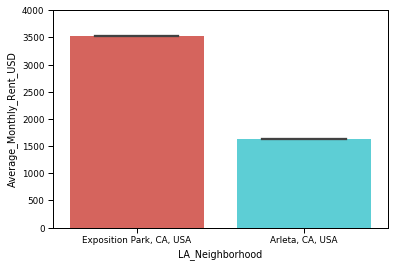

In [92]:
# barplot Average_Monthly_Rent_$ by La_Neighborhood with Location
sns.set_context('paper')

# create plot
plt0=sns.barplot(x = 'LA_Neighborhood', y = 'Average_Monthly_Rent_USD', data = FINAL_COMPARISON_SUMMARY,
            palette = 'hls',
            capsize = 0.5,             
            saturation = 0.9,             
            #errcolor = 'gray', errwidth = 2,  
            #ci = 'sd'  
           )

plt0.set_ylim(0.0, 4000)
plt.show


##### The Average monthly rent is higher in Exposition Park than in Arleta Neighborhood of Los Angeles. 


#### 6.2.2)  DISCUSSION - MEDIAN_DISTANCE 

In [93]:
FINAL_COMPARISON_SUMMARY.groupby('LA_Neighborhood', as_index=False)['Median Distance (km)'].mean()

,LA_Neighborhood,Median Distance (km)
0,"Arleta, CA, USA",1.420
1,"Exposition Park, CA, USA",0.768


<function matplotlib.pyplot.show(*args, **kw)>

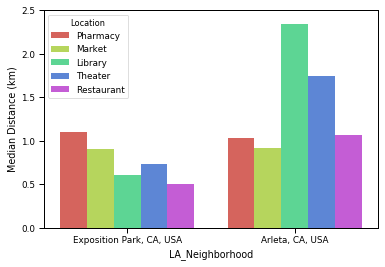

In [94]:
# barplot Mean Distance by La_Neighborhood with Location
sns.set_context('paper')

# create plot
plt1=sns.barplot(x = 'LA_Neighborhood', y = 'Median Distance (km)', hue = 'Location', data = FINAL_COMPARISON_SUMMARY,
            palette = 'hls',
            capsize = 0.5,             
            saturation = 0.9,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'   
           )
plt1.set_ylim(0.0,2.5)
plt.show


#####  Both Exposition Park and Arleta neighborhoods have all of the of the five venues of interest being represented. 
##### The mean average distance to the venues present appears to be  higher in Arleta than in Exposition Park.

#### 6.2.3) DISCUSSION - NUMBER OF VENUES FOUND

<function matplotlib.pyplot.show(*args, **kw)>

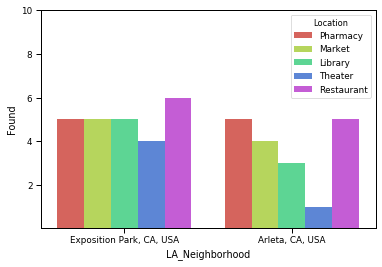

In [95]:
# barplot Mean Distance by La_Neighborhood with Location
sns.set_context('paper')

# create plot
plt2=sns.barplot(x = 'LA_Neighborhood', y = 'Found', hue = 'Location', data = FINAL_COMPARISON_SUMMARY,
            palette = 'hls',
            capsize = 0.5,             
            saturation = 0.9,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'   
            )
plt2.set_ylim(0.05, 10)
plt.show


##### Both Arleta and Exposition Park have all of the five venues present within 2000m of the target co-ordinates.
##### Exposition Park has the same number or more of each venue type found, within 2000m of the target coordinates.

In [96]:
# Color Legend
import sys 
from termcolor import colored, cprint
print ('Map legend color is:')
cprint('Home', 'red')
cprint( Location1, 'blue')
cprint(Location2, 'green')
cprint(Location3, 'cyan')
cprint(Location4, 'magenta')
cprint(Location5, 'yellow')

print (' ')
print (Neighborhood)

# display map
venues_map1

Map legend color is:
Home
Pharmacy
Market
Library
Theater
Restaurant
 
Exposition Park, CA, USA


In [97]:
print (Neighborhood2)
venues_map2

Arleta, CA, USA


# 7. CONCLUSION

In this assignment I tried to  combine and use rental data that is available online, and the FourSquare API app to explore the neighborhoods in the city of Los Angeles, CA.<br>
The aim was to see if the combination  can be used to get a better understanding of neighborhoods in a target city and if, based on user preference and input, are any neighborhoods in a city of greater interest to rent in  as compared to others.

The city that I explored is Los Angeles, CA.

The data was treated as discussed in the data section.

K-Means clustering was applied to the data and the 5 clusters plotted on the map of Los Angeles using Folium

I used on hot encoding on this data to find the ten most frequently occurring venues in these neighborhoods.

I then filtered the dataset to find neighborhoods that had  'Theaters' as the top three most frequently occurring venues.

I used the Four Square API to search for the presence of five venues of my choice, in two of these neighborhoods.
These five venues being 'Pharmacy', 'Market', 'Library', Theatre', Restaurant'.

This search returned the number of venues if found and the distance of each of the venues from the neighborhood coordinates.

I used all this information to put together a report that is detailed in the Results section.

<br>
<br>

### To summarize: 
#### Within a 2000m radius of the neighborhood coordinates:
#### Exposition Park  has a higher rent that Arleta and has the same number or more of the selected venues. 
#### The venues  in Arleta are more spread out as compared to Exposition Park.
#### From the maps it can be seen that Exposition Park is near two major freeways and Arleta sits at the intesection three freeways. 

<br>
<br>
<br>

### In  conclusion, 
I think that it is possible to use the neighborhood data, rental data and the FourSquare API to explore and search neighborhood for venues of ones choice and come to an informed decision on which neighborhood is better to rent in.

This choice will likely be very personal.

<br>

Future Improvements:

More venues can be searched per neighborhood using a bigger radius.
More than two neighborhoods can be compared.

I think that adding crime data  for various neighborhoods would  add a new dimension to the data, that would help make a more informed decision. ( I was unable to locate suitably paired neighborhood - rent - crime data.)

I also think that the coding efficiency for this assignment can be improved with more experience!!


THANK YOU FOR YOUR TIME!



# THE END OF ASSIGNMENT REPORT

This notebook is part of a course on **Coursera** called *Applied Data Science Capstone*. If you accessed this notebook outside the course, you can take this course online by clicking [here](http://cocl.us/DP0701EN_Coursera_Week2_LAB1).

<hr>
Copyright &copy; 2018 [Cognitive Class](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).